In [2]:
!pip install kaggle

In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!mkdir .kaggle

A subdirectory or file .kaggle already exists.


In [11]:
import json
token = {"username":"barbus1","key":"XXX"}
with open('.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [12]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [13]:
!chmod 600 /content/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
!kaggle datasets download -d sohier/crime-in-baltimore -p /content --force --unzip


  0%|          | 0.00/8.59M [00:00<?, ?B/s]
 23%|##3       | 2.00M/8.59M [00:00<00:00, 11.8MB/s]
 47%|####6     | 4.00M/8.59M [00:00<00:00, 12.6MB/s]
 70%|######9   | 6.00M/8.59M [00:00<00:00, 13.0MB/s]
 93%|#########3| 8.00M/8.59M [00:00<00:00, 13.5MB/s]
100%|##########| 8.59M/8.59M [00:00<00:00, 13.9MB/s]


In [17]:
conda install geopandas

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jbarb\Anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    conda-4.8.3                |           py37_0         2.8 MB
    expat-2.2.5                |       he025d50_0          83 KB
    fiona-1.8.4                |   py37h22081e2_0         605 KB
    freexl-1.0.5               |       hfa6e2cd_0          50 KB
    gdal-2.3.3                 |   py37hdf43c64_0         984 KB
    geopandas-0.6.1       

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sys
import sklearn as svm
import geopandas as gpd
import shapely.geometry 
import fiona
import pyproj 
import six
from shapely.geometry import Point, Polygon

In [2]:
df = pd.read_csv('C:\content\BPD_Part_1_Victim_Based_Crime_Data.csv')

In [3]:
df

CrimeDate CrimeTime CrimeCode               Location  \
0       09/02/2017  23:30:00       3JK        4200 AUDREY AVE   
1       09/02/2017  23:00:00        7A      800 NEWINGTON AVE   
2       09/02/2017  22:53:00        9S          600 RADNOR AV   
3       09/02/2017  22:50:00        4C         1800 RAMSAY ST   
4       09/02/2017  22:31:00        4E           100 LIGHT ST   
...            ...       ...       ...                    ...   
276524  01/01/2012  00:00:00        6J           1400 JOH AVE   
276525  01/01/2012  00:00:00        6J       5500 SINCLAIR LN   
276526  01/01/2012  00:00:00        6E  400 N PATTERSON PK AV   
276527  01/01/2012  00:00:00        5A        5800 LILLYAN AV   
276528  01/01/2012  00:00:00        5A      1900 GRINNALDS AV   

                Description Inside/Outside   Weapon   Post      District  \
0       ROBBERY - RESIDENCE              I    KNIFE  913.0      SOUTHERN   
1                AUTO THEFT              O      NaN  133.0       CENTRAL   
2                  SHOOTING        Outside  FIREARM  524.0      NORTHERN   
3              AGG. ASSAULT              I    OTHER  934.0      SOUTHERN   
4            COMMON ASSAULT              O    HANDS  113.0       CENTRAL   
...                     ...            ...      ...    ...           ...   
276524              LARCENY              I      NaN  832.0  SOUTHWESTERN   
276525              LARCENY              O      NaN  444.0  NORTHEASTERN   
276526              LARCENY              O      NaN  321.0       EASTERN   
276527             BURGLARY              I      NaN  425.0  NORTHEASTERN   
276528             BURGLARY              I      NaN  831.0  SOUTHWESTERN   

            Neighborhood  Longitude  Latitude  \
0               Brooklyn  -76.60541  39.22951   
1         Reservoir Hill  -76.63217  39.31360   
2         Winston-Govans  -76.60697  39.34768   
3       Carrollton Ridge  -76.64526  39.28315   
4          Downtown West  -76.61365  39.28756   
...                  ...        ...       ...   
276524       Violetville  -76.67195  39.26132   
276525         Frankford  -76.53829  39.32493   
276526              CARE  -76.58497  39.29573   
276527    Glenham-Belhar  -76.54578  39.34701   
276528      Morrell Park  -76.65094  39.26698   

                             Location 1     Premise  Total Incidents  
0       (39.2295100000, -76.6054100000)  ROW/TOWNHO                1  
1       (39.3136000000, -76.6321700000)      STREET                1  
2       (39.3476800000, -76.6069700000)      Street                1  
3       (39.2831500000, -76.6452600000)  ROW/TOWNHO                1  
4       (39.2875600000, -76.6136500000)      STREET                1  
...                                 ...         ...              ...  
276524  (39.2613200000, -76.6719500000)  OTHER - IN                1  
276525  (39.3249300000, -76.5382900000)  OTHER - OU                1  
276526  (39.2957300000, -76.5849700000)      STREET                1  
276527  (39.3470100000, -76.5457800000)  APT. LOCKE                1  
276528  (39.2669800000, -76.6509400000)  ROW/TOWNHO                1  

[276529 rows x 15 columns]

In [4]:
df.describe()

Post      Longitude       Latitude  Total Incidents
count  276305.000000  274325.000000  274325.000000         276529.0
mean      506.256821     -76.617444      39.307399              1.0
std       260.735370       0.042306       0.029556              0.0
min         2.000000     -76.711620      39.200410              1.0
25%       243.000000     -76.648460      39.288330              1.0
50%       511.000000     -76.613960      39.303640              1.0
75%       731.000000     -76.587440      39.327810              1.0
max       945.000000     -76.528500      39.372930              1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
CrimeDate          276529 non-null object
CrimeTime          276529 non-null object
CrimeCode          276529 non-null object
Location           274322 non-null object
Description        276529 non-null object
Inside/Outside     266250 non-null object
Weapon             95577 non-null object
Post               276305 non-null float64
District           276449 non-null object
Neighborhood       273789 non-null object
Longitude          274325 non-null float64
Latitude           274325 non-null float64
Location 1         274325 non-null object
Premise            265772 non-null object
Total Incidents    276529 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [6]:
df.dropna(how = 'all')

CrimeDate CrimeTime CrimeCode               Location  \
0       09/02/2017  23:30:00       3JK        4200 AUDREY AVE   
1       09/02/2017  23:00:00        7A      800 NEWINGTON AVE   
2       09/02/2017  22:53:00        9S          600 RADNOR AV   
3       09/02/2017  22:50:00        4C         1800 RAMSAY ST   
4       09/02/2017  22:31:00        4E           100 LIGHT ST   
...            ...       ...       ...                    ...   
276524  01/01/2012  00:00:00        6J           1400 JOH AVE   
276525  01/01/2012  00:00:00        6J       5500 SINCLAIR LN   
276526  01/01/2012  00:00:00        6E  400 N PATTERSON PK AV   
276527  01/01/2012  00:00:00        5A        5800 LILLYAN AV   
276528  01/01/2012  00:00:00        5A      1900 GRINNALDS AV   

                Description Inside/Outside   Weapon   Post      District  \
0       ROBBERY - RESIDENCE              I    KNIFE  913.0      SOUTHERN   
1                AUTO THEFT              O      NaN  133.0       CENTRAL   
2                  SHOOTING        Outside  FIREARM  524.0      NORTHERN   
3              AGG. ASSAULT              I    OTHER  934.0      SOUTHERN   
4            COMMON ASSAULT              O    HANDS  113.0       CENTRAL   
...                     ...            ...      ...    ...           ...   
276524              LARCENY              I      NaN  832.0  SOUTHWESTERN   
276525              LARCENY              O      NaN  444.0  NORTHEASTERN   
276526              LARCENY              O      NaN  321.0       EASTERN   
276527             BURGLARY              I      NaN  425.0  NORTHEASTERN   
276528             BURGLARY              I      NaN  831.0  SOUTHWESTERN   

            Neighborhood  Longitude  Latitude  \
0               Brooklyn  -76.60541  39.22951   
1         Reservoir Hill  -76.63217  39.31360   
2         Winston-Govans  -76.60697  39.34768   
3       Carrollton Ridge  -76.64526  39.28315   
4          Downtown West  -76.61365  39.28756   
...                  ...        ...       ...   
276524       Violetville  -76.67195  39.26132   
276525         Frankford  -76.53829  39.32493   
276526              CARE  -76.58497  39.29573   
276527    Glenham-Belhar  -76.54578  39.34701   
276528      Morrell Park  -76.65094  39.26698   

                             Location 1     Premise  Total Incidents  
0       (39.2295100000, -76.6054100000)  ROW/TOWNHO                1  
1       (39.3136000000, -76.6321700000)      STREET                1  
2       (39.3476800000, -76.6069700000)      Street                1  
3       (39.2831500000, -76.6452600000)  ROW/TOWNHO                1  
4       (39.2875600000, -76.6136500000)      STREET                1  
...                                 ...         ...              ...  
276524  (39.2613200000, -76.6719500000)  OTHER - IN                1  
276525  (39.3249300000, -76.5382900000)  OTHER - OU                1  
276526  (39.2957300000, -76.5849700000)      STREET                1  
276527  (39.3470100000, -76.5457800000)  APT. LOCKE                1  
276528  (39.2669800000, -76.6509400000)  ROW/TOWNHO                1  

[276529 rows x 15 columns]

In [7]:
df['Weapon'].unique()

array(['KNIFE', nan, 'FIREARM', 'OTHER', 'HANDS'], dtype=object)

In [8]:
df['CrimeCode'].unique()

array(['3JK', '7A', '9S', '4C', '4E', '5A', '1F', '3B', '3CF', '6C', '6D',
       '5D', '6G', '6J', '5B', '4D', '3K', '3AF', '6B', '4B', '3AK', '7C',
       '3AO', '8AO', '6E', '4A', '6F', '6H', '3AJF', '3D', '3JF', '4F',
       '3CO', '5C', '3GF', '8H', '2A', '5F', '8AV', '3GO', '3BJ', '3CK',
       '1O', '3AJO', '3JO', '5E', '3AJK', '1K', '3NF', '6A', '8BO', '2B',
       '3GK', '3H', '3EK', '3P', '8J', '6L', '3LF', '3LO', '3EF', '8FO',
       '3M', '7B', '3F', '8FV', '8BV', '3NK', '3EO', '8EO', '8GO', '8DO',
       '8CO', '3NO', '3LK', '8GV', '8I', '8CV', '8EV', '6K', '3N'],
      dtype=object)

What is Crime code? 


In [9]:
df['Description'].unique()

array(['ROBBERY - RESIDENCE', 'AUTO THEFT', 'SHOOTING', 'AGG. ASSAULT',
       'COMMON ASSAULT', 'BURGLARY', 'HOMICIDE', 'ROBBERY - STREET',
       'ROBBERY - COMMERCIAL', 'LARCENY', 'LARCENY FROM AUTO', 'ARSON',
       'ROBBERY - CARJACKING', 'ASSAULT BY THREAT', 'RAPE'], dtype=object)

Description vs Crime Code?

In [10]:
df1 = df.iloc[:, 2:5]

In [11]:
df1.drop('Location', axis =1, inplace = True)

In [12]:
df2 = df1.groupby(['Description']).agg(['unique'])

In [13]:
df2

CrimeCode
                                                                 unique
Description                                                            
AGG. ASSAULT                                           [4C, 4D, 4B, 4A]
ARSON                 [8AO, 8H, 8AV, 8BO, 8J, 8FO, 8FV, 8BV, 8EO, 8G...
ASSAULT BY THREAT                                                  [4F]
AUTO THEFT                                                 [7A, 7C, 7B]
BURGLARY                                       [5A, 5D, 5B, 5C, 5F, 5E]
COMMON ASSAULT                                                     [4E]
HOMICIDE                                                   [1F, 1O, 1K]
LARCENY                        [6C, 6G, 6J, 6B, 6E, 6F, 6H, 6A, 6L, 6K]
LARCENY FROM AUTO                                                  [6D]
RAPE                                                           [2A, 2B]
ROBBERY - CARJACKING                            [3AJF, 3BJ, 3AJO, 3AJK]
ROBBERY - COMMERCIAL  [3CF, 3D, 3CO, 3GF, 3GO, 3CK, 3GK, 3H, 3EK, 3L...
ROBBERY - RESIDENCE                                 [3JK, 3K, 3JF, 3JO]
ROBBERY - STREET             [3B, 3AF, 3AK, 3AO, 3NF, 3P, 3NK, 3NO, 3N]
SHOOTING                                                           [9S]

In [14]:
pd.set_option('display.max_colwidth', -1)

In [15]:
df2

CrimeCode
                                                                                             unique
Description                                                                                        
AGG. ASSAULT          [4C, 4D, 4B, 4A]                                                             
ARSON                 [8AO, 8H, 8AV, 8BO, 8J, 8FO, 8FV, 8BV, 8EO, 8GO, 8DO, 8CO, 8GV, 8I, 8CV, 8EV]
ASSAULT BY THREAT     [4F]                                                                         
AUTO THEFT            [7A, 7C, 7B]                                                                 
BURGLARY              [5A, 5D, 5B, 5C, 5F, 5E]                                                     
COMMON ASSAULT        [4E]                                                                         
HOMICIDE              [1F, 1O, 1K]                                                                 
LARCENY               [6C, 6G, 6J, 6B, 6E, 6F, 6H, 6A, 6L, 6K]                                     
LARCENY FROM AUTO     [6D]                                                                         
RAPE                  [2A, 2B]                                                                     
ROBBERY - CARJACKING  [3AJF, 3BJ, 3AJO, 3AJK]                                                      
ROBBERY - COMMERCIAL  [3CF, 3D, 3CO, 3GF, 3GO, 3CK, 3GK, 3H, 3EK, 3LF, 3LO, 3EF, 3M, 3F, 3EO, 3LK] 
ROBBERY - RESIDENCE   [3JK, 3K, 3JF, 3JO]                                                          
ROBBERY - STREET      [3B, 3AF, 3AK, 3AO, 3NF, 3P, 3NK, 3NO, 3N]                                   
SHOOTING              [9S]

In [16]:
df.drop(['CrimeCode'], axis = 1, inplace = True)

In [17]:
df.rename(columns = {'Inside/Outside': 'In_Out'}, inplace = True)

In [18]:
df

CrimeDate CrimeTime               Location          Description  \
0       09/02/2017  23:30:00  4200 AUDREY AVE        ROBBERY - RESIDENCE   
1       09/02/2017  23:00:00  800 NEWINGTON AVE      AUTO THEFT            
2       09/02/2017  22:53:00  600 RADNOR AV          SHOOTING              
3       09/02/2017  22:50:00  1800 RAMSAY ST         AGG. ASSAULT          
4       09/02/2017  22:31:00  100 LIGHT ST           COMMON ASSAULT        
...            ...       ...           ...                      ...        
276524  01/01/2012  00:00:00  1400 JOH AVE           LARCENY               
276525  01/01/2012  00:00:00  5500 SINCLAIR LN       LARCENY               
276526  01/01/2012  00:00:00  400 N PATTERSON PK AV  LARCENY               
276527  01/01/2012  00:00:00  5800 LILLYAN AV        BURGLARY              
276528  01/01/2012  00:00:00  1900 GRINNALDS AV      BURGLARY              

         In_Out   Weapon   Post      District      Neighborhood  Longitude  \
0       I        KNIFE    913.0  SOUTHERN      Brooklyn         -76.60541    
1       O        NaN      133.0  CENTRAL       Reservoir Hill   -76.63217    
2       Outside  FIREARM  524.0  NORTHERN      Winston-Govans   -76.60697    
3       I        OTHER    934.0  SOUTHERN      Carrollton Ridge -76.64526    
4       O        HANDS    113.0  CENTRAL       Downtown West    -76.61365    
...    ..          ...      ...      ...                 ...          ...    
276524  I        NaN      832.0  SOUTHWESTERN  Violetville      -76.67195    
276525  O        NaN      444.0  NORTHEASTERN  Frankford        -76.53829    
276526  O        NaN      321.0  EASTERN       CARE             -76.58497    
276527  I        NaN      425.0  NORTHEASTERN  Glenham-Belhar   -76.54578    
276528  I        NaN      831.0  SOUTHWESTERN  Morrell Park     -76.65094    

        Latitude                       Location 1     Premise  Total Incidents  
0       39.22951  (39.2295100000, -76.6054100000)  ROW/TOWNHO  1                
1       39.31360  (39.3136000000, -76.6321700000)  STREET      1                
2       39.34768  (39.3476800000, -76.6069700000)  Street      1                
3       39.28315  (39.2831500000, -76.6452600000)  ROW/TOWNHO  1                
4       39.28756  (39.2875600000, -76.6136500000)  STREET      1                
...          ...                              ...     ...     ..                
276524  39.26132  (39.2613200000, -76.6719500000)  OTHER - IN  1                
276525  39.32493  (39.3249300000, -76.5382900000)  OTHER - OU  1                
276526  39.29573  (39.2957300000, -76.5849700000)  STREET      1                
276527  39.34701  (39.3470100000, -76.5457800000)  APT. LOCKE  1                
276528  39.26698  (39.2669800000, -76.6509400000)  ROW/TOWNHO  1                

[276529 rows x 14 columns]

In [19]:
df['In_Out'].unique()

array(['I', 'O', 'Outside', nan, 'Inside'], dtype=object)

In [20]:
df['In_Out'].replace('Inside','I', regex = True, inplace = True)

In [21]:
df['In_Out'].replace('Outside','O', regex = True, inplace = True)

In [22]:
df['In_Out'].unique()

array(['I', 'O', nan], dtype=object)

In [23]:
df["DateTime"] = df["CrimeDate"] +" "+ df["CrimeTime"]

In [24]:
df['DateTime']=pd.to_datetime(df['DateTime'], infer_datetime_format=True, errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
CrimeDate          276529 non-null object
CrimeTime          276529 non-null object
Location           274322 non-null object
Description        276529 non-null object
In_Out             266250 non-null object
Weapon             95577 non-null object
Post               276305 non-null float64
District           276449 non-null object
Neighborhood       273789 non-null object
Longitude          274325 non-null float64
Latitude           274325 non-null float64
Location 1         274325 non-null object
Premise            265772 non-null object
Total Incidents    276529 non-null int64
DateTime           276528 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 31.6+ MB


In [26]:
df

CrimeDate CrimeTime               Location          Description  \
0       09/02/2017  23:30:00  4200 AUDREY AVE        ROBBERY - RESIDENCE   
1       09/02/2017  23:00:00  800 NEWINGTON AVE      AUTO THEFT            
2       09/02/2017  22:53:00  600 RADNOR AV          SHOOTING              
3       09/02/2017  22:50:00  1800 RAMSAY ST         AGG. ASSAULT          
4       09/02/2017  22:31:00  100 LIGHT ST           COMMON ASSAULT        
...            ...       ...           ...                      ...        
276524  01/01/2012  00:00:00  1400 JOH AVE           LARCENY               
276525  01/01/2012  00:00:00  5500 SINCLAIR LN       LARCENY               
276526  01/01/2012  00:00:00  400 N PATTERSON PK AV  LARCENY               
276527  01/01/2012  00:00:00  5800 LILLYAN AV        BURGLARY              
276528  01/01/2012  00:00:00  1900 GRINNALDS AV      BURGLARY              

       In_Out   Weapon   Post      District      Neighborhood  Longitude  \
0       I      KNIFE    913.0  SOUTHERN      Brooklyn         -76.60541    
1       O      NaN      133.0  CENTRAL       Reservoir Hill   -76.63217    
2       O      FIREARM  524.0  NORTHERN      Winston-Govans   -76.60697    
3       I      OTHER    934.0  SOUTHERN      Carrollton Ridge -76.64526    
4       O      HANDS    113.0  CENTRAL       Downtown West    -76.61365    
...    ..        ...      ...      ...                 ...          ...    
276524  I      NaN      832.0  SOUTHWESTERN  Violetville      -76.67195    
276525  O      NaN      444.0  NORTHEASTERN  Frankford        -76.53829    
276526  O      NaN      321.0  EASTERN       CARE             -76.58497    
276527  I      NaN      425.0  NORTHEASTERN  Glenham-Belhar   -76.54578    
276528  I      NaN      831.0  SOUTHWESTERN  Morrell Park     -76.65094    

        Latitude                       Location 1     Premise  \
0       39.22951  (39.2295100000, -76.6054100000)  ROW/TOWNHO   
1       39.31360  (39.3136000000, -76.6321700000)  STREET       
2       39.34768  (39.3476800000, -76.6069700000)  Street       
3       39.28315  (39.2831500000, -76.6452600000)  ROW/TOWNHO   
4       39.28756  (39.2875600000, -76.6136500000)  STREET       
...          ...                              ...     ...       
276524  39.26132  (39.2613200000, -76.6719500000)  OTHER - IN   
276525  39.32493  (39.3249300000, -76.5382900000)  OTHER - OU   
276526  39.29573  (39.2957300000, -76.5849700000)  STREET       
276527  39.34701  (39.3470100000, -76.5457800000)  APT. LOCKE   
276528  39.26698  (39.2669800000, -76.6509400000)  ROW/TOWNHO   

        Total Incidents            DateTime  
0       1               2017-09-02 23:30:00  
1       1               2017-09-02 23:00:00  
2       1               2017-09-02 22:53:00  
3       1               2017-09-02 22:50:00  
4       1               2017-09-02 22:31:00  
...    ..                               ...  
276524  1               2012-01-01 00:00:00  
276525  1               2012-01-01 00:00:00  
276526  1               2012-01-01 00:00:00  
276527  1               2012-01-01 00:00:00  
276528  1               2012-01-01 00:00:00  

[276529 rows x 15 columns]

In [27]:
df['Total Incidents'].unique()

array([1], dtype=int64)

In [28]:
df.drop('Total Incidents', axis = 1, inplace = True)

In [29]:
df.drop(['CrimeDate', 'CrimeTime'], axis = 1, inplace = True)

In [30]:
df

Location          Description In_Out   Weapon   Post  \
0       4200 AUDREY AVE        ROBBERY - RESIDENCE  I      KNIFE    913.0   
1       800 NEWINGTON AVE      AUTO THEFT           O      NaN      133.0   
2       600 RADNOR AV          SHOOTING             O      FIREARM  524.0   
3       1800 RAMSAY ST         AGG. ASSAULT         I      OTHER    934.0   
4       100 LIGHT ST           COMMON ASSAULT       O      HANDS    113.0   
...              ...                      ...      ..        ...      ...   
276524  1400 JOH AVE           LARCENY              I      NaN      832.0   
276525  5500 SINCLAIR LN       LARCENY              O      NaN      444.0   
276526  400 N PATTERSON PK AV  LARCENY              O      NaN      321.0   
276527  5800 LILLYAN AV        BURGLARY             I      NaN      425.0   
276528  1900 GRINNALDS AV      BURGLARY             I      NaN      831.0   

            District      Neighborhood  Longitude  Latitude  \
0       SOUTHERN      Brooklyn         -76.60541   39.22951   
1       CENTRAL       Reservoir Hill   -76.63217   39.31360   
2       NORTHERN      Winston-Govans   -76.60697   39.34768   
3       SOUTHERN      Carrollton Ridge -76.64526   39.28315   
4       CENTRAL       Downtown West    -76.61365   39.28756   
...         ...                 ...          ...        ...   
276524  SOUTHWESTERN  Violetville      -76.67195   39.26132   
276525  NORTHEASTERN  Frankford        -76.53829   39.32493   
276526  EASTERN       CARE             -76.58497   39.29573   
276527  NORTHEASTERN  Glenham-Belhar   -76.54578   39.34701   
276528  SOUTHWESTERN  Morrell Park     -76.65094   39.26698   

                             Location 1     Premise            DateTime  
0       (39.2295100000, -76.6054100000)  ROW/TOWNHO 2017-09-02 23:30:00  
1       (39.3136000000, -76.6321700000)  STREET     2017-09-02 23:00:00  
2       (39.3476800000, -76.6069700000)  Street     2017-09-02 22:53:00  
3       (39.2831500000, -76.6452600000)  ROW/TOWNHO 2017-09-02 22:50:00  
4       (39.2875600000, -76.6136500000)  STREET     2017-09-02 22:31:00  
...                                 ...     ...                     ...  
276524  (39.2613200000, -76.6719500000)  OTHER - IN 2012-01-01 00:00:00  
276525  (39.3249300000, -76.5382900000)  OTHER - OU 2012-01-01 00:00:00  
276526  (39.2957300000, -76.5849700000)  STREET     2012-01-01 00:00:00  
276527  (39.3470100000, -76.5457800000)  APT. LOCKE 2012-01-01 00:00:00  
276528  (39.2669800000, -76.6509400000)  ROW/TOWNHO 2012-01-01 00:00:00  

[276529 rows x 12 columns]

In [31]:
df['Weapon'].fillna('None or Unknown', inplace = True)

In [32]:
df['Weapon'].unique()

array(['KNIFE', 'None or Unknown', 'FIREARM', 'OTHER', 'HANDS'],
      dtype=object)

In [33]:
df['District'].unique()

array(['SOUTHERN', 'CENTRAL', 'NORTHERN', 'SOUTHEASTERN', 'NORTHWESTERN',
       'EASTERN', 'SOUTHWESTERN', 'NORTHEASTERN', 'WESTERN', nan],
      dtype=object)

In [34]:
df.loc[df['Location 1'].isnull()]

Location          Description In_Out           Weapon   Post  \
222     NaN      ROBBERY - STREET     NaN    FIREARM          843.0   
230     NaN      LARCENY              I      None or Unknown  511.0   
303     NaN      ROBBERY - STREET     O      FIREARM          211.0   
305     NaN      LARCENY FROM AUTO    O      None or Unknown  612.0   
639     NaN      ROBBERY - RESIDENCE  I      None or Unknown  425.0   
...     ...                      ... ..                  ...    ...   
274099  NaN      ARSON                O      None or Unknown  715.0   
274147  NaN      LARCENY FROM AUTO    O      None or Unknown  322.0   
274244  NaN      ROBBERY - STREET     O      FIREARM          922.0   
274548  NaN      COMMON ASSAULT       O      HANDS            832.0   
276273  NaN      LARCENY              O      None or Unknown  111.0   

            District Neighborhood  Longitude  Latitude Location 1     Premise  \
222     SOUTHWESTERN  NaN         NaN        NaN        NaN        NaN          
230     NORTHERN      NaN         NaN        NaN        NaN        HOSP/NURS.   
303     SOUTHEASTERN  NaN         NaN        NaN        NaN        STREET       
305     NORTHWESTERN  NaN         NaN        NaN        NaN        ALLEY        
639     NORTHEASTERN  NaN         NaN        NaN        NaN        ROW/TOWNHO   
...              ...  ...          ..         ..        ...               ...   
274099  WESTERN       NaN         NaN        NaN        NaN        OTHER - OU   
274147  EASTERN       NaN         NaN        NaN        NaN        STREET       
274244  SOUTHERN      NaN         NaN        NaN        NaN        STREET       
274548  SOUTHWESTERN  NaN         NaN        NaN        NaN        STREET       
276273  CENTRAL       NaN         NaN        NaN        NaN        STREET       

                  DateTime  
222    2017-08-31 16:04:00  
230    2017-08-31 14:30:00  
303    2017-01-19 19:35:00  
305    2017-08-30 22:30:00  
639    2017-01-02 08:50:00  
...                    ...  
274099 2012-01-20 23:03:00  
274147 2012-01-20 16:40:00  
274244 2012-01-19 21:29:00  
274548 2012-01-17 18:30:00  
276273 2012-01-02 18:20:00  

[2204 rows x 12 columns]

Two thousand rows where location is null, this is less than 1 percent of dataset, can drop without losing too much data

In [35]:
df1 = df.dropna(how = 'any')
df1.shape

(263118, 12)

Dropping all NaN results in less than 5% of data lost... This is acceptable due to amount of data available, will drop all


In [36]:
del df1

In [37]:
df = df.dropna(how = 'any')

In [38]:
df['Premise'] = df['Premise'].str.upper()

C:\Users\jbarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df['Premise'].unique()

array(['ROW/TOWNHO', 'STREET', 'RETAIL/SMA', 'YARD', 'OTHER - IN',
       'CONVENIENC', 'OFFICE BUI', 'APT/CONDO', 'PARKING LO',
       'LAUNDRY/CL', 'CARRY OUT', 'HOSP/NURS.', 'RESTAURANT', 'BAR',
       'GARAGE ON', 'ALLEY', 'DRIVEWAY', 'PORCH/DECK', 'SHED/GARAG',
       'TRACTOR TR', 'GAS STATIO', 'PLAYGROUND', 'BUS/AUTO', 'DRUG STORE',
       'PARK', 'GROCERY/CO', 'CAR LOT-NE', 'SHOPPING M', 'LIQUOR STO',
       'CHAIN FOOD', 'OTHER - OU', 'POLICE DEP', 'CLOTHING/S',
       'YARD/BUSIN', 'SPECIALTY', 'POOL/BOWLI', 'INNER HARB',
       'VACANT BUI', 'SCHOOL', 'OTHER/RESI', 'HOTEL/MOTE', 'DEPARTMENT',
       'WAREHOUSE', 'BUS.  STOR', 'RELIGIOUS', 'DWELLING', 'TAVERN/NIG',
       'APARTMENT', 'BARBER/BEA', 'SINGLE HOU', 'PUBLIC BUI',
       'MINI STORA', 'FAST FOOD', 'DOCTORS OF', 'STADIUM', 'HOUSE UNDE',
       'UNKNOWN', 'BUS/RAILRO', 'LIBRARY', 'CAR  REPAI', 'AUTO PARTS',
       'CONSTRUCTI', 'WHOLESALE/', 'VEHICLE', 'FIRE DEPAR', 'PUBLIC HOU',
       'RACE TRACK', 'RECREATION', '

In [40]:
df

Location          Description In_Out           Weapon  \
0       4200 AUDREY AVE        ROBBERY - RESIDENCE  I      KNIFE             
1       800 NEWINGTON AVE      AUTO THEFT           O      None or Unknown   
2       600 RADNOR AV          SHOOTING             O      FIREARM           
3       1800 RAMSAY ST         AGG. ASSAULT         I      OTHER             
4       100 LIGHT ST           COMMON ASSAULT       O      HANDS             
...              ...                      ...      ..        ...             
276524  1400 JOH AVE           LARCENY              I      None or Unknown   
276525  5500 SINCLAIR LN       LARCENY              O      None or Unknown   
276526  400 N PATTERSON PK AV  LARCENY              O      None or Unknown   
276527  5800 LILLYAN AV        BURGLARY             I      None or Unknown   
276528  1900 GRINNALDS AV      BURGLARY             I      None or Unknown   

         Post      District      Neighborhood  Longitude  Latitude  \
0       913.0  SOUTHERN      Brooklyn         -76.60541   39.22951   
1       133.0  CENTRAL       Reservoir Hill   -76.63217   39.31360   
2       524.0  NORTHERN      Winston-Govans   -76.60697   39.34768   
3       934.0  SOUTHERN      Carrollton Ridge -76.64526   39.28315   
4       113.0  CENTRAL       Downtown West    -76.61365   39.28756   
...       ...      ...                 ...          ...        ...   
276524  832.0  SOUTHWESTERN  Violetville      -76.67195   39.26132   
276525  444.0  NORTHEASTERN  Frankford        -76.53829   39.32493   
276526  321.0  EASTERN       CARE             -76.58497   39.29573   
276527  425.0  NORTHEASTERN  Glenham-Belhar   -76.54578   39.34701   
276528  831.0  SOUTHWESTERN  Morrell Park     -76.65094   39.26698   

                             Location 1     Premise            DateTime  
0       (39.2295100000, -76.6054100000)  ROW/TOWNHO 2017-09-02 23:30:00  
1       (39.3136000000, -76.6321700000)  STREET     2017-09-02 23:00:00  
2       (39.3476800000, -76.6069700000)  STREET     2017-09-02 22:53:00  
3       (39.2831500000, -76.6452600000)  ROW/TOWNHO 2017-09-02 22:50:00  
4       (39.2875600000, -76.6136500000)  STREET     2017-09-02 22:31:00  
...                                 ...     ...                     ...  
276524  (39.2613200000, -76.6719500000)  OTHER - IN 2012-01-01 00:00:00  
276525  (39.3249300000, -76.5382900000)  OTHER - OU 2012-01-01 00:00:00  
276526  (39.2957300000, -76.5849700000)  STREET     2012-01-01 00:00:00  
276527  (39.3470100000, -76.5457800000)  APT. LOCKE 2012-01-01 00:00:00  
276528  (39.2669800000, -76.6509400000)  ROW/TOWNHO 2012-01-01 00:00:00  

[263118 rows x 12 columns]

In [41]:
crs = {'init': 'epsg:4326'}

In [42]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs = crs)

In [43]:
gdf

Location          Description In_Out           Weapon  \
0       4200 AUDREY AVE        ROBBERY - RESIDENCE  I      KNIFE             
1       800 NEWINGTON AVE      AUTO THEFT           O      None or Unknown   
2       600 RADNOR AV          SHOOTING             O      FIREARM           
3       1800 RAMSAY ST         AGG. ASSAULT         I      OTHER             
4       100 LIGHT ST           COMMON ASSAULT       O      HANDS             
...              ...                      ...      ..        ...             
276524  1400 JOH AVE           LARCENY              I      None or Unknown   
276525  5500 SINCLAIR LN       LARCENY              O      None or Unknown   
276526  400 N PATTERSON PK AV  LARCENY              O      None or Unknown   
276527  5800 LILLYAN AV        BURGLARY             I      None or Unknown   
276528  1900 GRINNALDS AV      BURGLARY             I      None or Unknown   

         Post      District      Neighborhood  Longitude  Latitude  \
0       913.0  SOUTHERN      Brooklyn         -76.60541   39.22951   
1       133.0  CENTRAL       Reservoir Hill   -76.63217   39.31360   
2       524.0  NORTHERN      Winston-Govans   -76.60697   39.34768   
3       934.0  SOUTHERN      Carrollton Ridge -76.64526   39.28315   
4       113.0  CENTRAL       Downtown West    -76.61365   39.28756   
...       ...      ...                 ...          ...        ...   
276524  832.0  SOUTHWESTERN  Violetville      -76.67195   39.26132   
276525  444.0  NORTHEASTERN  Frankford        -76.53829   39.32493   
276526  321.0  EASTERN       CARE             -76.58497   39.29573   
276527  425.0  NORTHEASTERN  Glenham-Belhar   -76.54578   39.34701   
276528  831.0  SOUTHWESTERN  Morrell Park     -76.65094   39.26698   

                             Location 1     Premise            DateTime  \
0       (39.2295100000, -76.6054100000)  ROW/TOWNHO 2017-09-02 23:30:00   
1       (39.3136000000, -76.6321700000)  STREET     2017-09-02 23:00:00   
2       (39.3476800000, -76.6069700000)  STREET     2017-09-02 22:53:00   
3       (39.2831500000, -76.6452600000)  ROW/TOWNHO 2017-09-02 22:50:00   
4       (39.2875600000, -76.6136500000)  STREET     2017-09-02 22:31:00   
...                                 ...     ...                     ...   
276524  (39.2613200000, -76.6719500000)  OTHER - IN 2012-01-01 00:00:00   
276525  (39.3249300000, -76.5382900000)  OTHER - OU 2012-01-01 00:00:00   
276526  (39.2957300000, -76.5849700000)  STREET     2012-01-01 00:00:00   
276527  (39.3470100000, -76.5457800000)  APT. LOCKE 2012-01-01 00:00:00   
276528  (39.2669800000, -76.6509400000)  ROW/TOWNHO 2012-01-01 00:00:00   

                          geometry  
0       POINT (-76.60541 39.22951)  
1       POINT (-76.63217 39.31360)  
2       POINT (-76.60697 39.34768)  
3       POINT (-76.64526 39.28315)  
4       POINT (-76.61365 39.28756)  
...                            ...  
276524  POINT (-76.67195 39.26132)  
276525  POINT (-76.53829 39.32493)  
276526  POINT (-76.58497 39.29573)  
276527  POINT (-76.54578 39.34701)  
276528  POINT (-76.65094 39.26698)  

[263118 rows x 13 columns]

Geometry point created, no need to keep longxlat or location 1

In [44]:
gdf

Location          Description In_Out           Weapon  \
0       4200 AUDREY AVE        ROBBERY - RESIDENCE  I      KNIFE             
1       800 NEWINGTON AVE      AUTO THEFT           O      None or Unknown   
2       600 RADNOR AV          SHOOTING             O      FIREARM           
3       1800 RAMSAY ST         AGG. ASSAULT         I      OTHER             
4       100 LIGHT ST           COMMON ASSAULT       O      HANDS             
...              ...                      ...      ..        ...             
276524  1400 JOH AVE           LARCENY              I      None or Unknown   
276525  5500 SINCLAIR LN       LARCENY              O      None or Unknown   
276526  400 N PATTERSON PK AV  LARCENY              O      None or Unknown   
276527  5800 LILLYAN AV        BURGLARY             I      None or Unknown   
276528  1900 GRINNALDS AV      BURGLARY             I      None or Unknown   

         Post      District      Neighborhood  Longitude  Latitude  \
0       913.0  SOUTHERN      Brooklyn         -76.60541   39.22951   
1       133.0  CENTRAL       Reservoir Hill   -76.63217   39.31360   
2       524.0  NORTHERN      Winston-Govans   -76.60697   39.34768   
3       934.0  SOUTHERN      Carrollton Ridge -76.64526   39.28315   
4       113.0  CENTRAL       Downtown West    -76.61365   39.28756   
...       ...      ...                 ...          ...        ...   
276524  832.0  SOUTHWESTERN  Violetville      -76.67195   39.26132   
276525  444.0  NORTHEASTERN  Frankford        -76.53829   39.32493   
276526  321.0  EASTERN       CARE             -76.58497   39.29573   
276527  425.0  NORTHEASTERN  Glenham-Belhar   -76.54578   39.34701   
276528  831.0  SOUTHWESTERN  Morrell Park     -76.65094   39.26698   

                             Location 1     Premise            DateTime  \
0       (39.2295100000, -76.6054100000)  ROW/TOWNHO 2017-09-02 23:30:00   
1       (39.3136000000, -76.6321700000)  STREET     2017-09-02 23:00:00   
2       (39.3476800000, -76.6069700000)  STREET     2017-09-02 22:53:00   
3       (39.2831500000, -76.6452600000)  ROW/TOWNHO 2017-09-02 22:50:00   
4       (39.2875600000, -76.6136500000)  STREET     2017-09-02 22:31:00   
...                                 ...     ...                     ...   
276524  (39.2613200000, -76.6719500000)  OTHER - IN 2012-01-01 00:00:00   
276525  (39.3249300000, -76.5382900000)  OTHER - OU 2012-01-01 00:00:00   
276526  (39.2957300000, -76.5849700000)  STREET     2012-01-01 00:00:00   
276527  (39.3470100000, -76.5457800000)  APT. LOCKE 2012-01-01 00:00:00   
276528  (39.2669800000, -76.6509400000)  ROW/TOWNHO 2012-01-01 00:00:00   

                          geometry  
0       POINT (-76.60541 39.22951)  
1       POINT (-76.63217 39.31360)  
2       POINT (-76.60697 39.34768)  
3       POINT (-76.64526 39.28315)  
4       POINT (-76.61365 39.28756)  
...                            ...  
276524  POINT (-76.67195 39.26132)  
276525  POINT (-76.53829 39.32493)  
276526  POINT (-76.58497 39.29573)  
276527  POINT (-76.54578 39.34701)  
276528  POINT (-76.65094 39.26698)  

[263118 rows x 13 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

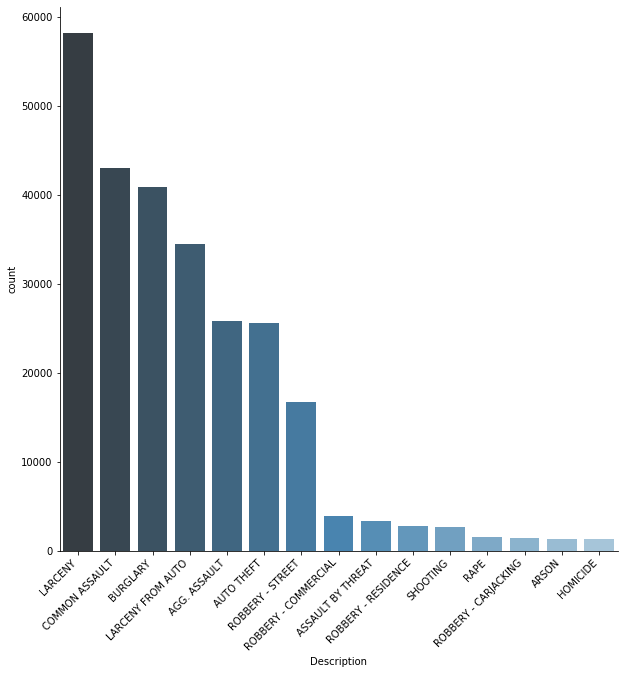

In [45]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x = 'Description', palette = 'Blues_d', data = gdf, order = df['Description'].value_counts().index)
sns.despine()
plt.xticks(rotation = 45, ha = 'right')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

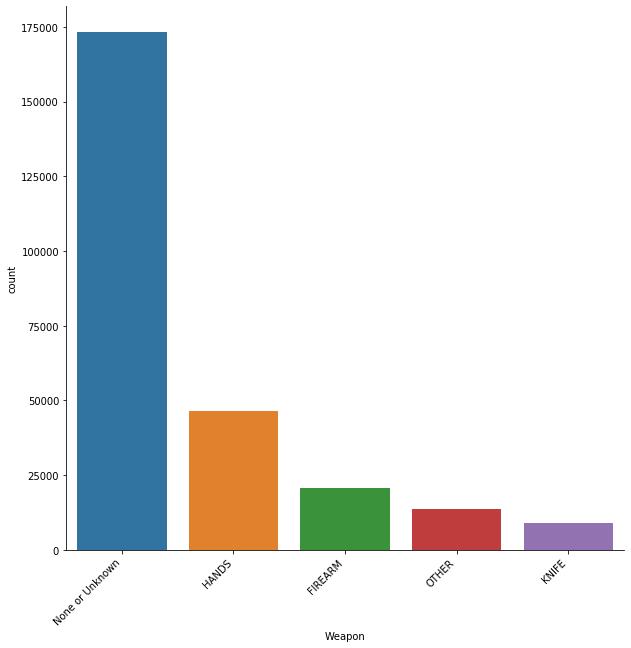

In [46]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x = 'Weapon', data = gdf, order = df['Weapon'].value_counts().index)
sns.despine()
plt.xticks(rotation = 45, ha = 'right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

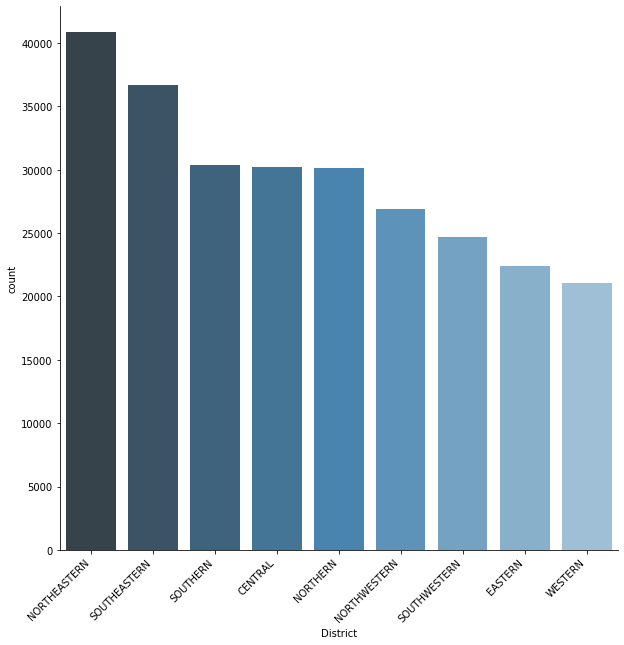

In [47]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x = 'District', data = gdf,  palette = 'Blues_d', order = df['District'].value_counts().index)
sns.despine()
plt.xticks(rotation = 45, ha = 'right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

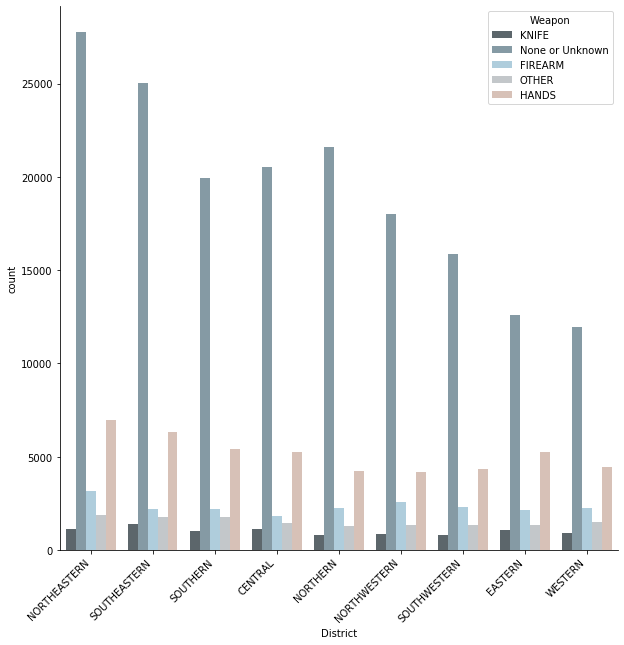

In [48]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x = 'District', data = gdf, palette = 'RdBu_d', hue = 'Weapon', order = df['District'].value_counts().index)
sns.despine()
plt.xticks(rotation = 45, ha = 'right')

In [49]:
baltimore = gpd.read_file('https://data.baltimorecity.gov/api/views/deus-s85f/files/uvSrbSrNNI6kxdQMdA7Rdp9rx-tLl6m1xGI0baktz2Q?filename=Building.zip')

In [50]:
conda install descartes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jbarb\Anaconda3

  added / updated specs:
    - descartes


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [52]:
import descartes
from descartes.patch import PolygonPatch

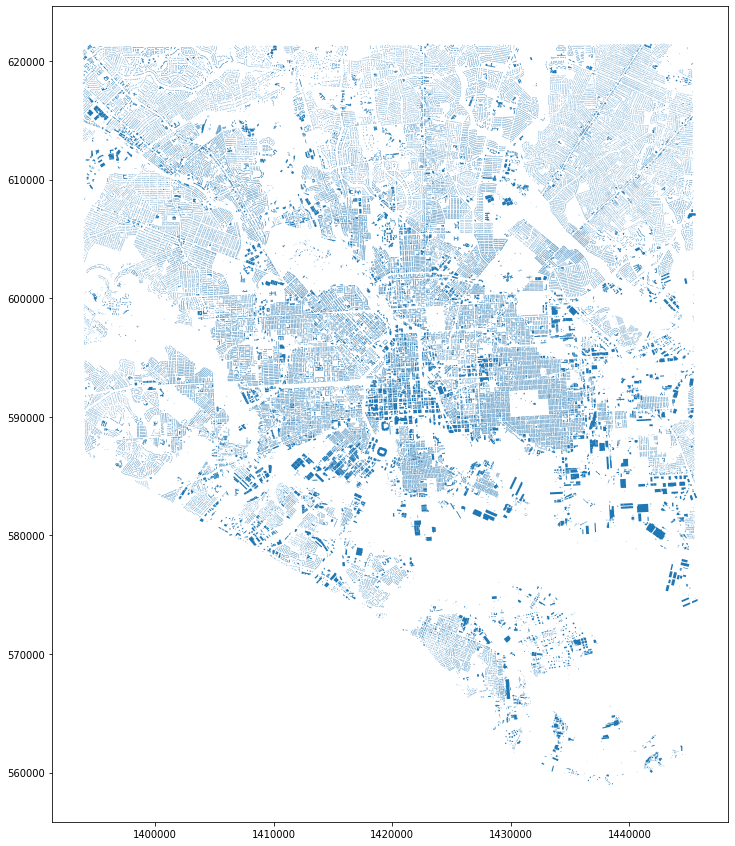

In [53]:
fig, ax = plt.subplots(figsize = (15,15))
baltimore.plot(ax = ax)

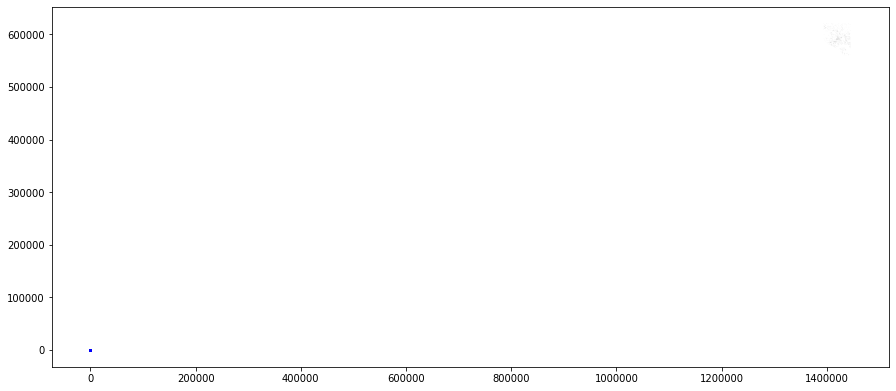

In [54]:
fig, ax = plt.subplots( figsize = (15,15))
baltimore.plot(ax = ax, color = 'grey', alpha = .4)
gdf[gdf['Description']==('ROBBERY - STREET')].plot(ax = ax, color = 'red', markersize = 1, alpha = .5 )
gdf[gdf['Description']==('SHOOTING')].plot(ax = ax, color = 'green', markersize = 1, alpha = .5)
gdf[gdf['Description']==('RAPE')].plot(ax = ax, color = 'blue', markersize = 1 )

In [55]:
crimecam = gpd.read_file('https://data.baltimorecity.gov/api/geospatial/jit3-cud7?method=export&format=Shapefile')

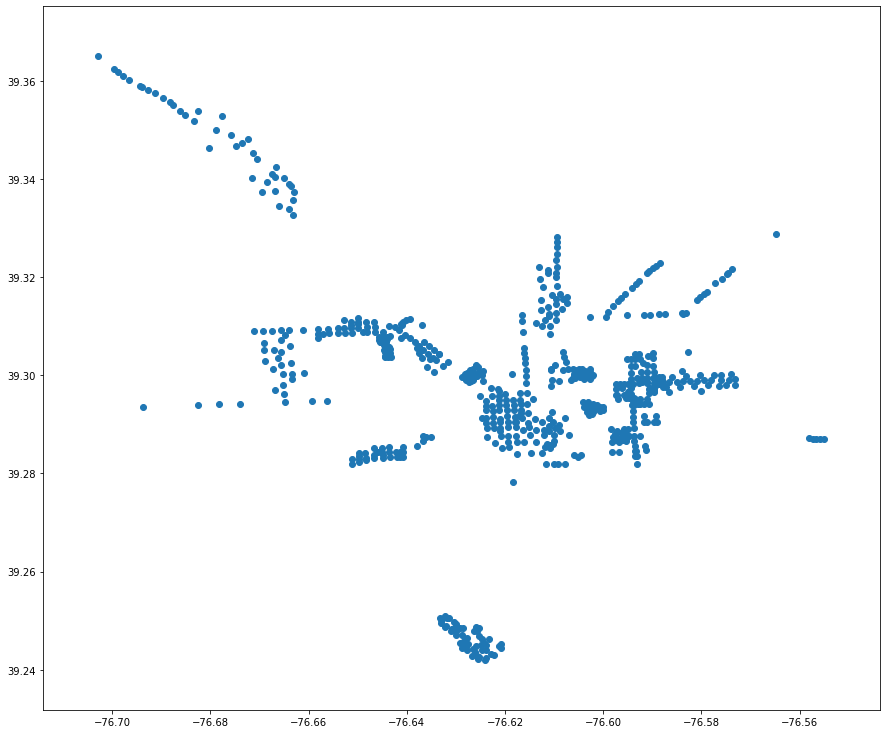

In [56]:
fig, ax = plt.subplots(figsize = (15,15))
crimecam.plot(ax = ax)

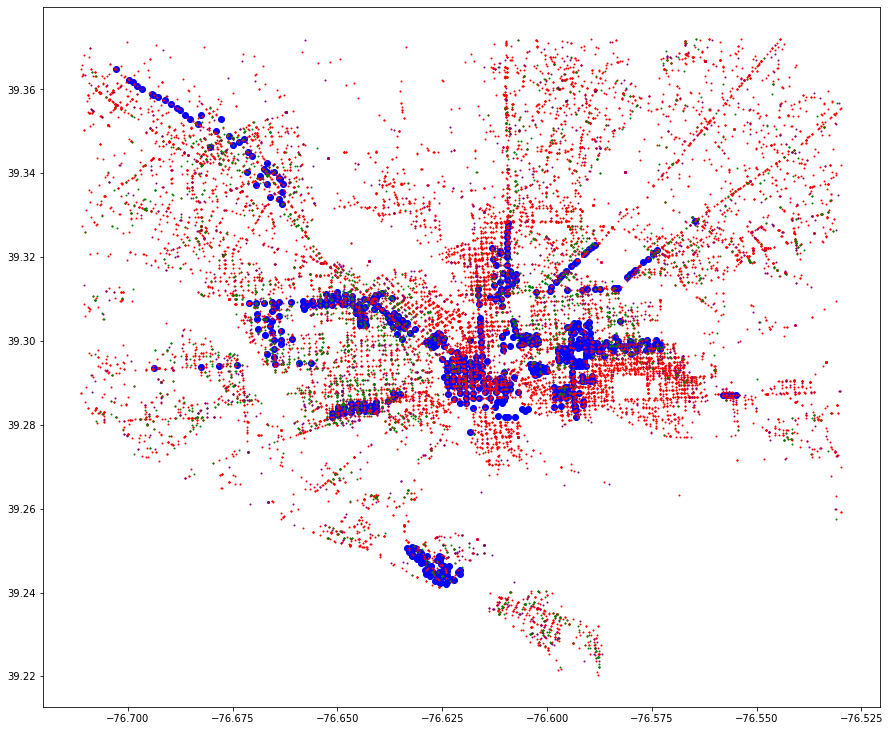

In [57]:
fig, ax = plt.subplots( figsize = (15,15))
crimecam.plot(ax = ax, color = 'blue')
gdf[gdf['Description']==('ROBBERY - STREET')].plot(ax = ax, color = 'red', markersize = 1)
gdf[gdf['Description']==('SHOOTING')].plot(ax = ax, color = 'green', markersize = 1)
gdf[gdf['Description']==('RAPE')].plot(ax = ax, color = 'purple', markersize = 1 )

In [58]:
street = gpd.read_file('https://data.baltimorecity.gov/api/geospatial/tau7-6emy?method=export&format=Shapefile')

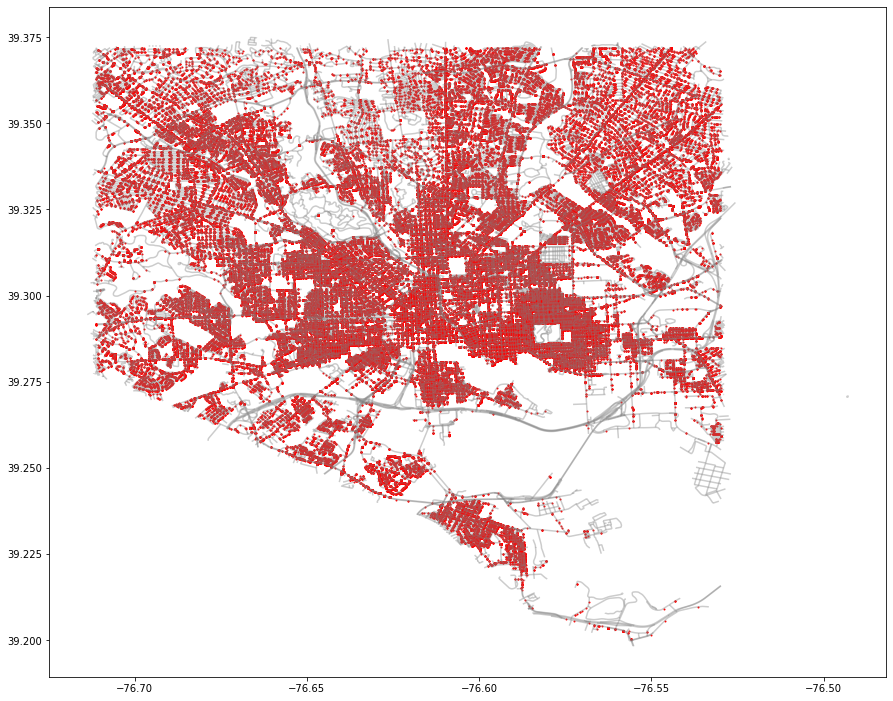

In [59]:
fig, ax = plt.subplots( figsize = (15,15))
street.plot(ax = ax, color = 'grey', alpha = .4)
gdf.plot(ax = ax, color = 'red', markersize = 1)

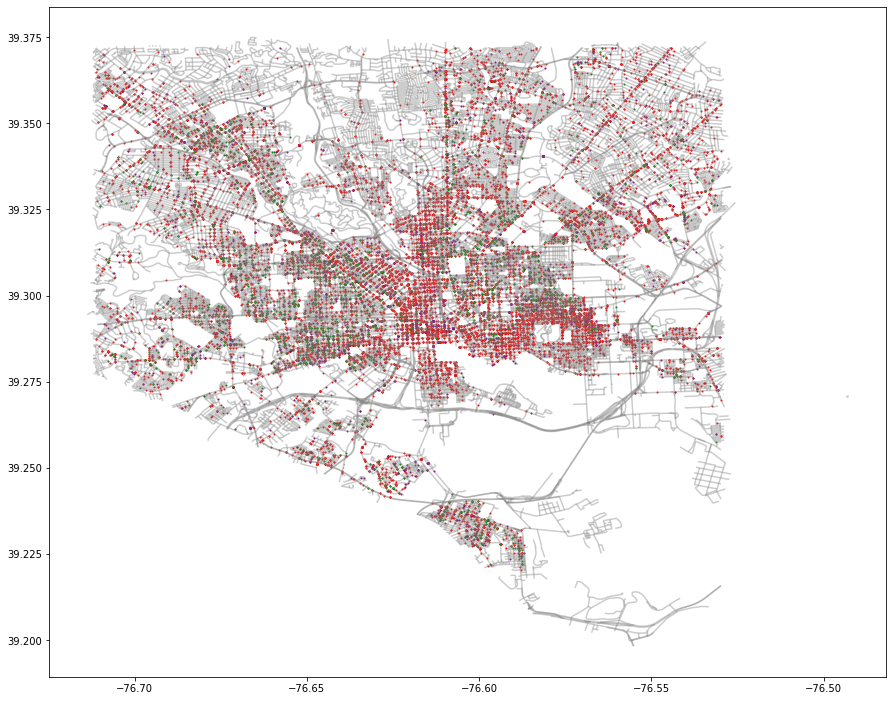

In [60]:
fig, ax = plt.subplots( figsize = (15,15))
street.plot(ax = ax, color = 'grey', alpha = .4)
gdf[gdf['Description']==('ROBBERY - STREET')].plot(ax = ax, color = 'red', markersize = 1)
gdf[gdf['Description']==('SHOOTING')].plot(ax = ax, color = 'green', markersize = 1)
gdf[gdf['Description']==('RAPE')].plot(ax = ax, color = 'purple', markersize = 1 )

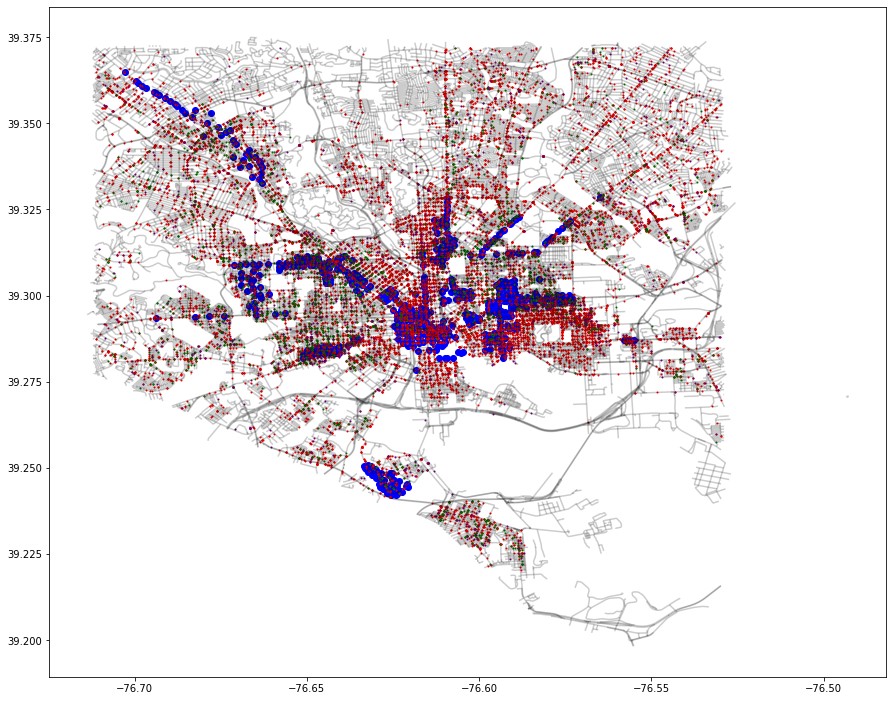

In [61]:
fig, ax = plt.subplots( figsize = (15,15))
crimecam.plot(ax = ax, color = 'blue')
street.plot(ax = ax, color = 'black', alpha = .2)
gdf[gdf['Description']==('ROBBERY - STREET')].plot(ax = ax, color = 'red', markersize = 1)
gdf[gdf['Description']==('SHOOTING')].plot(ax = ax, color = 'green', markersize = 1)
gdf[gdf['Description']==('RAPE')].plot(ax = ax, color = 'purple', markersize = 1 )

In [62]:
gdf = gdf.set_index('DateTime') 

In [63]:
gdf.head

<bound method NDFrame.head of                                   Location          Description In_Out  \
DateTime                                                                 
2017-09-02 23:30:00  4200 AUDREY AVE        ROBBERY - RESIDENCE  I       
2017-09-02 23:00:00  800 NEWINGTON AVE      AUTO THEFT           O       
2017-09-02 22:53:00  600 RADNOR AV          SHOOTING             O       
2017-09-02 22:50:00  1800 RAMSAY ST         AGG. ASSAULT         I       
2017-09-02 22:31:00  100 LIGHT ST           COMMON ASSAULT       O       
...                             ...                  ...        ..       
2012-01-01 00:00:00  1400 JOH AVE           LARCENY              I       
2012-01-01 00:00:00  5500 SINCLAIR LN       LARCENY              O       
2012-01-01 00:00:00  400 N PATTERSON PK AV  LARCENY              O       
2012-01-01 00:00:00  5800 LILLYAN AV        BURGLARY             I       
2012-01-01 00:00:00  1900 GRINNALDS AV      BURGLARY             I       

       

In [64]:
permitdf = pd.read_csv('https://data.baltimorecity.gov/api/views/cdz5-3y2u/rows.csv?accessType=DOWNLOAD')

In [65]:
permitdf["intermediate_location_text"]= permitdf["intermediate_location_text"].str.split(":", n = 1, expand = True)

In [78]:
permitdf

permit_id                             permit_name_full  \
0    ROW2015-SE1007308  PRATT STREET ALE HOUSE Orioles Opening Day    
1    ROW2015-SE1007310  "THE BAND" MARCHING UNIT HOME COMING PARADE   
2    ROW2015-SE1006847  Walk to End Alzheimer's                       
3    ROW2015-SE1007298  DTK 3ON3                                      
4    ROW2015-SE1007066  BALTIMORE INVITATIONAL REGATTA                
..                 ...                             ...                
163  ROW2014-SE1006357  2015 Walk MS                                  
164  ROW2015-SE1007332  ORIOLES GAMES (AUGUST, 2015)                  
165  ROW2015-SE1007322  ORIOLES GAMES (MAY 2015)                      
166  ROW2015-SE1007044  FAITH BAPTIST CHURCH                          
167  ROW2015-SE1006997  SLIDE THE CITY                                

                                           intermediate_location_text  \
0    W Pratt St & Hopkins Pl, Baltimore, Maryland, 21201                
1    S Monastery Ave & Massachusetts Ave, Baltimore, Maryland, 21229    
2    39.281917, -76.610977                                              
3    39.280420, -76.640771                                              
4    39.257167, -76.630266                                              
..                      ...                                             
163  39.284433, -76.612951                                              
164  39.285576, -76.622459                                              
165  Washington Blvd & Dover St, Baltimore, Maryland, 21230             
166  N Bond St & E Madison St, Baltimore, Maryland, 21205               
167  39.337676, -76.588286                                              

                 start_date  duration                end_date facility_type  
0    04/10/2015 08:00:00 AM  1         04/10/2015 11:00:00 PM  NaN           
1    04/25/2015 12:00:00 PM  1         04/25/2015 08:30:00 PM  Parade        
2    10/31/2015 05:30:00 AM  1         10/31/2015 03:00:00 PM  NaN           
3    08/07/2015 07:00:00 AM  10        08/16/2015 07:00:00 PM  NaN           
4    04/11/2015 06:00:00 AM  1         04/11/2015 04:00:00 PM  NaN           
..                      ... ..                            ...  ...           
163  04/26/2015 12:00:00 AM  1         04/26/2015 11:59:00 PM  NaN           
164  08/01/2015 12:00:00 AM  31        08/31/2015 11:59:00 PM  Other         
165  05/01/2015 12:00:00 AM  31        05/31/2015 11:59:00 PM  Other         
166  04/18/2015 12:00:00 AM  1         04/18/2015 11:59:00 PM  NaN           
167  06/06/2015 11:00:00 AM  1         06/06/2015 08:00:00 PM  NaN           

[167 rows x 7 columns]

In [79]:
conda install -c conda-forge geopy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jbarb\Anaconda3

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [80]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter as rt

In [81]:
locator = Nominatim(user_agent='myGeocoder')
geocode = rt(locator.geocode, min_delay_seconds=1)

In [82]:
permitdf["intermediate_location_text"]= permitdf["intermediate_location_text"].str.replace('(Closest Intersection)' ,'', case = False)

In [83]:
permitdf["intermediate_location_text"]= permitdf["intermediate_location_text"].str.replace('(Closest Street)' ,'', case = False)

In [84]:
permitdf["intermediate_location_text"]= permitdf['intermediate_location_text'].str.replace(r"\(\)","")

In [85]:
permitdf[permitdf.intermediate_location_text.isnull()]

Empty DataFrame
Columns: [permit_id, permit_name_full, intermediate_location_text, start_date, duration, end_date, facility_type]
Index: []

In [86]:
permitdf.drop(permitdf.index[28], inplace = True)

In [87]:
streetdf = permitdf[permitdf.intermediate_location_text.str.contains('.*[a-zA-Z].*')]

In [88]:
cordf = permitdf[~permitdf.intermediate_location_text.str.contains('.*[a-zA-Z].*')]

In [89]:
streetdf['location'] = streetdf['intermediate_location_text'].apply(geocode)

C:\Users\jbarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
streetdf

permit_id                                 permit_name_full  \
0    ROW2015-SE1007308  PRATT STREET ALE HOUSE Orioles Opening Day        
1    ROW2015-SE1007310  "THE BAND" MARCHING UNIT HOME COMING PARADE       
6    ROW2015-SE1007292  Quigleys 1/2 Irish Pub Opening Day Celebration    
7    ROW2015-SE1006705  BALTIMORE WALK TO DEFEAT ALS                      
8    ROW2015-SE1006761  SAINT ANTHONY FESTIVAL                            
9    ROW2015-SE1006740  HENRY AND NEVATER SAMPSON FOUNDATION INC.         
10   ROW2015-SE1006643  SOLE OF THE CITY 10K                              
21   ROW2015-SE1007389  KENTUCKY DERBY BLOCK PARTY                        
25   ROW2015-SE1007405  HIGHLANDTOWN WINE FESTIVAL                        
37   ROW2015-SE1007175  Baltimore Farmers' Market & Bazaar                
39   ROW2015-SE1006910  HUBBLE SPACE TELESCOPE 25TH BIRTHDAY              
40   ROW2015-SE1007257  Grace Presbyterian Church Community Flea Market   
46   ROW2014-SE1006551  MCVET 2015                                        
50   ROW2015-SE1007314  Keswick Improv. Assoc. BP                         
53   ROW2015-SE1007315  Park Heights Community Farmers Market             
59   ROW2015-SE1007303  YOUTH DAY CELEBRATION FESTIVAL                    
61   ROW2015-SE1007268  MARYLAND DEATHFEST                                
64   ROW2015-SE1007377  1400 REYNOLDS STREET (BLOCK PARTY)                
70   ROW2015-SE1006621  Brigance Brigade                                  
71   ROW2015-SE1007168  Blockenstein: A Monster Community Yard Sale       
74   ROW2015-SE1006901  test. test. blima. test new                       
77   ROW2015-SE1006979  South Baltimore Little League Annual Parade       
80   ROW2015-SE1007305  JAMES MOSHER OPENING DAY LITTLE LEAGUE PARADE     
89   ROW2015-SE1007408  Resources for a Better Tomorrow                   
96   ROW2015-SE1007351  310 WHITERIDGE BLOCK PARTY                        
97   ROW2015-SE1006944  ORIOLES PRE & POST GAME CELEBRATION               
103  ROW2015-SE1006714  BALTIMORE CHERRY BLOSSOM COMMUNITY FESTIVAL       
105  ROW2014-SE1006535  THE SHINDIG                                       
108  ROW2014-SE1006504  MOVEABLE FEAST                                    
114  ROW2014-SE1006014  4600 Pimlico Rd BP                                
115  ROW2015-SE1007037  PASQUETTA                                         
121  ROW2014-SE1005786  SCHROEDER STREET BP                               
122  ROW2015-SE1007407  400blk Millington Ave Block Party                 
128  ROW2015-SE1007393  3300blk Nerak Road Block Party                    
129  ROW2015-SE1006853  NFB Dot Dash 6k                                   
131  ROW2015-SE1006842  1300 NORTH CAREY STREET BLOCK PARTY               
133  ROW2015-SE1006866  THE NEW BETHLEHEM BAPT CHR BLOCK PARTY            
135  ROW2015-SE1007166  700blk S Glover Block Party                       
136  ROW2015-SE1006916  MISTRY/KLINE WEDDING                              
137  ROW2015-SE1006687  BALTMORE MARATHON                                 
138  ROW2014-SE1006564  32ND STREET FARMERS MARKET                        
142  ROW2014-SE1006384  Bombadillo                                        
144  ROW2015-SE1006949  SPRING IN TO GOOD HEALTH FESTIVAL                 
151  ROW2015-SE1007098  Good Friday Procession                            
152  ROW2015-SE1006990  Archdiocesan Youth & Youth Adult Pilgrimage       
154  ROW2015-SE1006919  ORIOLES PRE & POST GAME CELEBRATION               
165  ROW2015-SE1007322  ORIOLES GAMES (MAY 2015)                          
166  ROW2015-SE1007044  FAITH BAPTIST CHURCH                              

                                           intermediate_location_text  \
0    W Pratt St & Hopkins Pl, Baltimore, Maryland, 21201                
1    S Monastery Ave & Massachusetts Ave, Baltimore, Maryland, 21229    
6    Emory St & Portland St, Baltimore, Maryland, 21230                 
7    234 E Lombard St, Baltimore, Maryland, 2

In [91]:
streetdf['point'] = streetdf['location'].apply(lambda loc: tuple(loc.point) if loc else None)

C:\Users\jbarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
streetdf = streetdf[streetdf['point'].notnull()]

In [93]:
streetdf[['latitude', 'longitude', 'altitude']] = pd.DataFrame(streetdf['point'].tolist(), index=streetdf.index)

C:\Users\jbarb\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [94]:
streetdf.drop(['altitude', 'point'], axis = 1, inplace = True)

C:\Users\jbarb\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
cordf.shape

(118, 7)

In [96]:
cordf[['latitude','longitude']] = cordf['intermediate_location_text'].str.split(",",expand=True)

In [97]:
frames = [cordf , streetdf]
eventdf = pd.concat(frames)

C:\Users\jbarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [98]:
eventdf

duration                end_date facility_type  \
2    1         10/31/2015 03:00:00 PM  NaN            
3    10        08/16/2015 07:00:00 PM  NaN            
4    1         04/11/2015 04:00:00 PM  NaN            
5    1         06/06/2015 12:00:00 PM  Race           
11   1         07/25/2015 09:00:00 PM  NaN            
..  ..                            ...  ...            
133  1         04/25/2015 03:00:00 PM  NaN            
142  1         09/26/2015 11:00:00 PM  NaN            
151  1         04/03/2015 11:59:00 PM  Other          
152  1         03/28/2015 05:30:00 PM  NaN            
154  1         03/29/2015 08:00:00 PM  Other          

                                intermediate_location_text   latitude  \
2    39.281917, -76.610977                                  39.281917   
3    39.280420, -76.640771                                  39.280420   
4    39.257167, -76.630266                                  39.257167   
5    39.296705, -76.623872                                  39.296705   
11   39.297431, -76.615993                                  39.297431   
..                      ...                                       ...   
133  1300 N Carey St, Baltimore, Maryland, 21217            39.3035     
142  998 Lake Dr, Baltimore, Maryland, 21217                39.3174     
151  Bank St & S Highland Ave, Baltimore, Maryland, 21224   39.2894     
152  678 N Paca St, Baltimore, Maryland, 21201              39.2971     
154  522 Washington Blvd, Baltimore, Maryland, 21230        39.2854     

                                                                                                                                 location  \
2    NaN                                                                                                                                    
3    NaN                                                                                                                                    
4    NaN                                                                                                                                    
5    NaN                                                                                                                                    
11   NaN                                                                                                                                    
..   ...                                                                                                                                    
133  (1300, North Carey Street, Druid Heights, Baltimore, Maryland, 21217, United States of America, (39.303497, -76.639081))               
142  (Lake Drive, Penn North, Baltimore, Maryland, 21217, United States of America, (39.3173818, -76.6411174))                              
151  (South Highland Avenue, Highlandtown, Point Breeze, Baltimore, Maryland, 21224, United States of America, (39.2894182, -76.569209))    
152  (678, North Paca Street, Seton Hill, Baltimore, Maryland, 21201, United States of America, (39.297112516129026, -76.62260022580645))   
154  (522, Washington Boulevard, Ridgleys Delight, Baltimore, Maryland, 21230, United States of America, (39.28535, -76.623036))            

        longitude          permit_id  \
2     -76.610977   ROW2015-SE1006847   
3     -76.640771   ROW2015-SE1007298   
4     -76.630266   ROW2015-SE1007066   
5     -76.623872   ROW2015-SE1007133   
11    -76.615993   ROW2015-SE1007001   
..            ...                ...   
133 -76.6391       ROW2015-SE1006866   
142 -76.6411       ROW2014-SE1006384   
151 -76.5692       ROW2015-SE1007098   
152 -76.6226       ROW2015-SE1006990   
154 -76.623        ROW2015-SE1006919   

                                permit_name_full              start_date  
2    Walk to End Alzheimer's                      10/31/2015 05:30:00 AM  
3    DTK 3ON3                                     08/07/2015 07:00:00 AM  
4    BALTIMORE INVITATIONAL REGATTA               04/11/2015 06:00:0

In [99]:
eventdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 2 to 154
Data columns (total 10 columns):
duration                      129 non-null int64
end_date                      129 non-null object
facility_type                 45 non-null object
intermediate_location_text    129 non-null object
latitude                      129 non-null object
location                      11 non-null object
longitude                     129 non-null object
permit_id                     129 non-null object
permit_name_full              129 non-null object
start_date                    129 non-null object
dtypes: int64(1), object(9)
memory usage: 11.1+ KB


In [100]:
eventdf['latitude'] = pd.to_numeric(eventdf['latitude'])

In [101]:
eventdf['longitude'] = pd.to_numeric(eventdf['longitude'])

In [102]:
eventgdf = gpd.GeoDataFrame(eventdf, geometry=gpd.points_from_xy(eventdf.longitude, eventdf.latitude), crs = crs)

In [103]:
eventgdf

duration                end_date facility_type  \
2    1         10/31/2015 03:00:00 PM  NaN            
3    10        08/16/2015 07:00:00 PM  NaN            
4    1         04/11/2015 04:00:00 PM  NaN            
5    1         06/06/2015 12:00:00 PM  Race           
11   1         07/25/2015 09:00:00 PM  NaN            
..  ..                            ...  ...            
133  1         04/25/2015 03:00:00 PM  NaN            
142  1         09/26/2015 11:00:00 PM  NaN            
151  1         04/03/2015 11:59:00 PM  Other          
152  1         03/28/2015 05:30:00 PM  NaN            
154  1         03/29/2015 08:00:00 PM  Other          

                                intermediate_location_text   latitude  \
2    39.281917, -76.610977                                  39.281917   
3    39.280420, -76.640771                                  39.280420   
4    39.257167, -76.630266                                  39.257167   
5    39.296705, -76.623872                                  39.296705   
11   39.297431, -76.615993                                  39.297431   
..                      ...                                       ...   
133  1300 N Carey St, Baltimore, Maryland, 21217            39.303497   
142  998 Lake Dr, Baltimore, Maryland, 21217                39.317382   
151  Bank St & S Highland Ave, Baltimore, Maryland, 21224   39.289418   
152  678 N Paca St, Baltimore, Maryland, 21201              39.297113   
154  522 Washington Blvd, Baltimore, Maryland, 21230        39.285350   

                                                                                                                                 location  \
2    NaN                                                                                                                                    
3    NaN                                                                                                                                    
4    NaN                                                                                                                                    
5    NaN                                                                                                                                    
11   NaN                                                                                                                                    
..   ...                                                                                                                                    
133  (1300, North Carey Street, Druid Heights, Baltimore, Maryland, 21217, United States of America, (39.303497, -76.639081))               
142  (Lake Drive, Penn North, Baltimore, Maryland, 21217, United States of America, (39.3173818, -76.6411174))                              
151  (South Highland Avenue, Highlandtown, Point Breeze, Baltimore, Maryland, 21224, United States of America, (39.2894182, -76.569209))    
152  (678, North Paca Street, Seton Hill, Baltimore, Maryland, 21201, United States of America, (39.297112516129026, -76.62260022580645))   
154  (522, Washington Boulevard, Ridgleys Delight, Baltimore, Maryland, 21230, United States of America, (39.28535, -76.623036))            

     longitude          permit_id  \
2   -76.610977  ROW2015-SE1006847   
3   -76.640771  ROW2015-SE1007298   
4   -76.630266  ROW2015-SE1007066   
5   -76.623872  ROW2015-SE1007133   
11  -76.615993  ROW2015-SE1007001   
..         ...                ...   
133 -76.639081  ROW2015-SE1006866   
142 -76.641117  ROW2014-SE1006384   
151 -76.569209  ROW2015-SE1007098   
152 -76.622600  ROW2015-SE1006990   
154 -76.623036  ROW2015-SE1006919   

                                permit_name_full              start_date  \
2    Walk to End Alzheimer's                      10/31/2015 05:30:00 AM   
3    DTK 3ON3                                     08/07/2015 07:00:00 AM   
4    BALTIMORE INVITATIONAL REGATTA               04/11/2015 06:00:00 AM   
5    HEALTH FREEDOM CELEB

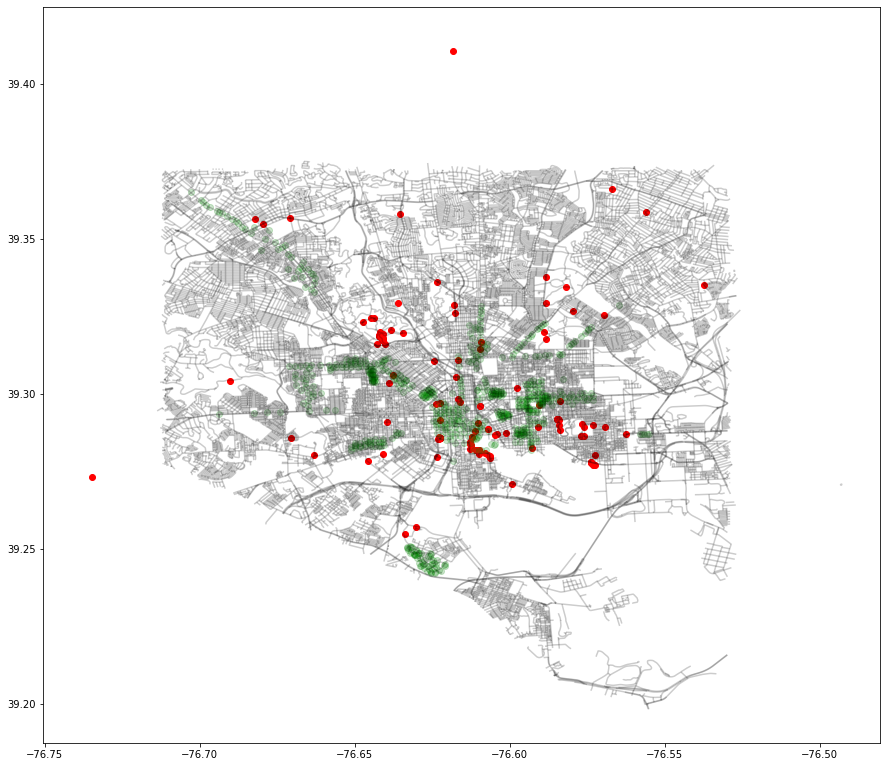

In [104]:
fig, ax = plt.subplots(figsize = (15,15))
eventgdf.plot(ax = ax, color = 'red')
street.plot(ax = ax, color = 'black', alpha = .2)
crimecam.plot(ax = ax, color = 'green', alpha = .2)

In [105]:
eventgdf['start_date']=pd.to_datetime(eventgdf['start_date'], infer_datetime_format=True)

In [106]:
eventgdf['end_date']=pd.to_datetime(eventgdf['end_date'], infer_datetime_format=True)

In [107]:
eventgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 129 entries, 2 to 154
Data columns (total 11 columns):
duration                      129 non-null int64
end_date                      129 non-null datetime64[ns]
facility_type                 45 non-null object
intermediate_location_text    129 non-null object
latitude                      129 non-null float64
location                      11 non-null object
longitude                     129 non-null float64
permit_id                     129 non-null object
permit_name_full              129 non-null object
start_date                    129 non-null datetime64[ns]
geometry                      129 non-null geometry
dtypes: datetime64[ns](2), float64(2), geometry(1), int64(1), object(5)
memory usage: 12.1+ KB


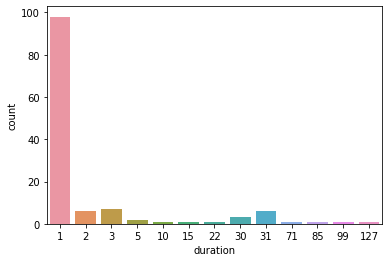

In [108]:
sns.countplot(x = 'duration', data = eventgdf)

In [109]:
eventgdf[eventgdf.duration != 1]

duration            end_date facility_type  \
3    10       2015-08-16 19:00:00  NaN            
14   31       2015-07-31 23:59:00  Other          
23   31       2015-07-31 23:59:00  Other          
26   30       2015-09-30 23:59:00  Other          
31   2        2015-04-11 23:59:00  NaN            
52   3        2015-09-27 19:00:00  NaN            
54   85       2015-09-12 23:00:00  Other          
56   2        2015-05-31 18:00:00  NaN            
65   3        2015-04-26 18:00:00  Festival       
66   2        2015-04-19 20:00:00  NaN            
67   5        2015-07-17 20:00:00  NaN            
81   2        2015-08-09 23:00:00  NaN            
83   22       2015-06-30 23:59:00  Other          
85   3        2015-07-19 20:00:00  Festival       
92   3        2015-05-24 23:59:00  Festival       
93   31       2015-10-31 23:59:00  Other          
110  30       2015-06-30 23:59:00  Other          
112  30       2015-09-30 23:59:00  Other          
116  127      2015-09-12 16:00:00  NaN            
117  31       2015-05-31 23:59:00  NaN            
118  5        2015-04-15 23:59:00  NaN            
124  15       2015-10-15 23:59:00  Other          
126  31       2015-08-31 23:59:00  Other          
143  3        2015-04-25 23:59:00  NaN            
148  71       2015-08-23 21:00:00  NaN            
157  99       2015-08-21 22:00:00  NaN            
160  2        2015-06-21 23:59:00  Festival       
161  2        2015-05-02 20:00:00  Other          
164  31       2015-08-31 23:59:00  Other          
61   3        2015-05-24 23:00:00  NaN            
74   3        2015-04-02 23:59:00  Festival       

                            intermediate_location_text   latitude  \
3    39.280420, -76.640771                              39.280420   
14   39.285593, -76.622464                              39.285593   
23   39.285658, -76.622381                              39.285658   
26   39.285598, -76.622468                              39.285598   
31   39.286188, -76.622668                              39.286188   
52   39.286919, -76.604227                              39.286919   
54   39.356268, -76.682151                              39.356268   
56   39.326056, -76.617719                              39.326056   
65   39.328708, -76.618041                              39.328708   
66   39.282560, -76.592855                              39.282560   
67   39.329200, -76.635908                              39.329200   
81   39.354716, -76.679482                              39.354716   
83   39.285594, -76.622459                              39.285594   
85   39.310709, -76.624427                              39.310709   
92   39.295959, -76.609483                              39.295959   
93   39.285659, -76.622384                              39.285659   
110  39.285662, -76.622386                              39.285662   
112  39.285657, -76.622381                              39.285657   
116  39.291798, -76.584578                              39.291798   
117  39.285656, -76.622386                              39.285656   
118  39.285262, -76.622944                              39.285262   
124  39.285593, -76.622459                              39.285593   
126  39.285661, -76.622388                              39.285661   
143  39.311009, -76.616550                              39.311009   
148  39.291558, -76.584245                              39.291558   
157  39.283318, -76.612385                              39.283318   
160  39.279705, -76.623442                              39.279705   
161  39.298384, -76.616858                              39.298384   
164  39.285576, -76.622459                              39.285576   
61   N High St & Fallsway, Baltimore, Maryland, 21202   39.296015   
74   3282 W Baltimore St, Baltimore, Maryland, 21229    39.285798   

                                                                                                                                                location  \
3    Na

In [110]:
eventgdf1 = eventgdf.loc[eventgdf.index.repeat(eventgdf.duration)].copy()
eventgdf1['day_number'] = eventgdf1.groupby(level=0).cumcount()
eventgdf1 = eventgdf1.reset_index(drop=True)

Events that last for more than one day are listed only once, the code above replicates the events by the amount of days they're listed and creates a column to tell me how many days out from the beginning the event day is


In [111]:
eventgdf1

duration            end_date facility_type  \
0    1        2015-10-31 15:00:00  NaN            
1    10       2015-08-16 19:00:00  NaN            
2    10       2015-08-16 19:00:00  NaN            
3    10       2015-08-16 19:00:00  NaN            
4    10       2015-08-16 19:00:00  NaN            
..   ..                       ...  ...            
841  1        2015-04-25 15:00:00  NaN            
842  1        2015-09-26 23:00:00  NaN            
843  1        2015-04-03 23:59:00  Other          
844  1        2015-03-28 17:30:00  NaN            
845  1        2015-03-29 20:00:00  Other          

                                intermediate_location_text   latitude  \
0    39.281917, -76.610977                                  39.281917   
1    39.280420, -76.640771                                  39.280420   
2    39.280420, -76.640771                                  39.280420   
3    39.280420, -76.640771                                  39.280420   
4    39.280420, -76.640771                                  39.280420   
..                      ...                                       ...   
841  1300 N Carey St, Baltimore, Maryland, 21217            39.303497   
842  998 Lake Dr, Baltimore, Maryland, 21217                39.317382   
843  Bank St & S Highland Ave, Baltimore, Maryland, 21224   39.289418   
844  678 N Paca St, Baltimore, Maryland, 21201              39.297113   
845  522 Washington Blvd, Baltimore, Maryland, 21230        39.285350   

                                                                                                                                 location  \
0    NaN                                                                                                                                    
1    NaN                                                                                                                                    
2    NaN                                                                                                                                    
3    NaN                                                                                                                                    
4    NaN                                                                                                                                    
..   ...                                                                                                                                    
841  (1300, North Carey Street, Druid Heights, Baltimore, Maryland, 21217, United States of America, (39.303497, -76.639081))               
842  (Lake Drive, Penn North, Baltimore, Maryland, 21217, United States of America, (39.3173818, -76.6411174))                              
843  (South Highland Avenue, Highlandtown, Point Breeze, Baltimore, Maryland, 21224, United States of America, (39.2894182, -76.569209))    
844  (678, North Paca Street, Seton Hill, Baltimore, Maryland, 21201, United States of America, (39.297112516129026, -76.62260022580645))   
845  (522, Washington Boulevard, Ridgleys Delight, Baltimore, Maryland, 21230, United States of America, (39.28535, -76.623036))            

     longitude          permit_id  \
0   -76.610977  ROW2015-SE1006847   
1   -76.640771  ROW2015-SE1007298   
2   -76.640771  ROW2015-SE1007298   
3   -76.640771  ROW2015-SE1007298   
4   -76.640771  ROW2015-SE1007298   
..         ...                ...   
841 -76.639081  ROW2015-SE1006866   
842 -76.641117  ROW2014-SE1006384   
843 -76.569209  ROW2015-SE1007098   
844 -76.622600  ROW2015-SE1006990   
845 -76.623036  ROW2015-SE1006919   

                                permit_name_full          start_date  \
0    Walk to End Alzheimer's                     2015-10-31 05:30:00   
1    DTK 3ON3                                    2015-08-07 07:00:00   
2    DTK 3ON3                                    2015-08-07 07:00:00   
3    DTK 3ON3                                    2015-08-07 07:00:00   
4    DTK 3ON3    

In [112]:
eventgdf1['start_date'] += pd.to_timedelta(eventgdf1['day_number'], unit='D')

Increment the days by day_number column to get different start dates for each event


In [113]:
eventgdf1

duration            end_date facility_type  \
0    1        2015-10-31 15:00:00  NaN            
1    10       2015-08-16 19:00:00  NaN            
2    10       2015-08-16 19:00:00  NaN            
3    10       2015-08-16 19:00:00  NaN            
4    10       2015-08-16 19:00:00  NaN            
..   ..                       ...  ...            
841  1        2015-04-25 15:00:00  NaN            
842  1        2015-09-26 23:00:00  NaN            
843  1        2015-04-03 23:59:00  Other          
844  1        2015-03-28 17:30:00  NaN            
845  1        2015-03-29 20:00:00  Other          

                                intermediate_location_text   latitude  \
0    39.281917, -76.610977                                  39.281917   
1    39.280420, -76.640771                                  39.280420   
2    39.280420, -76.640771                                  39.280420   
3    39.280420, -76.640771                                  39.280420   
4    39.280420, -76.640771                                  39.280420   
..                      ...                                       ...   
841  1300 N Carey St, Baltimore, Maryland, 21217            39.303497   
842  998 Lake Dr, Baltimore, Maryland, 21217                39.317382   
843  Bank St & S Highland Ave, Baltimore, Maryland, 21224   39.289418   
844  678 N Paca St, Baltimore, Maryland, 21201              39.297113   
845  522 Washington Blvd, Baltimore, Maryland, 21230        39.285350   

                                                                                                                                 location  \
0    NaN                                                                                                                                    
1    NaN                                                                                                                                    
2    NaN                                                                                                                                    
3    NaN                                                                                                                                    
4    NaN                                                                                                                                    
..   ...                                                                                                                                    
841  (1300, North Carey Street, Druid Heights, Baltimore, Maryland, 21217, United States of America, (39.303497, -76.639081))               
842  (Lake Drive, Penn North, Baltimore, Maryland, 21217, United States of America, (39.3173818, -76.6411174))                              
843  (South Highland Avenue, Highlandtown, Point Breeze, Baltimore, Maryland, 21224, United States of America, (39.2894182, -76.569209))    
844  (678, North Paca Street, Seton Hill, Baltimore, Maryland, 21201, United States of America, (39.297112516129026, -76.62260022580645))   
845  (522, Washington Boulevard, Ridgleys Delight, Baltimore, Maryland, 21230, United States of America, (39.28535, -76.623036))            

     longitude          permit_id  \
0   -76.610977  ROW2015-SE1006847   
1   -76.640771  ROW2015-SE1007298   
2   -76.640771  ROW2015-SE1007298   
3   -76.640771  ROW2015-SE1007298   
4   -76.640771  ROW2015-SE1007298   
..         ...                ...   
841 -76.639081  ROW2015-SE1006866   
842 -76.641117  ROW2014-SE1006384   
843 -76.569209  ROW2015-SE1007098   
844 -76.622600  ROW2015-SE1006990   
845 -76.623036  ROW2015-SE1006919   

                                permit_name_full          start_date  \
0    Walk to End Alzheimer's                     2015-10-31 05:30:00   
1    DTK 3ON3                                    2015-08-07 07:00:00   
2    DTK 3ON3                                    2015-08-08 07:00:00   
3    DTK 3ON3                                    2015-08-09 07:00:00   
4    DTK 3ON3    

In [114]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [115]:
df = pd.DataFrame(gdf)

In [116]:
gdf

Location          Description In_Out  \
DateTime                                                                 
2017-09-02 23:30:00  4200 AUDREY AVE        ROBBERY - RESIDENCE  I       
2017-09-02 23:00:00  800 NEWINGTON AVE      AUTO THEFT           O       
2017-09-02 22:53:00  600 RADNOR AV          SHOOTING             O       
2017-09-02 22:50:00  1800 RAMSAY ST         AGG. ASSAULT         I       
2017-09-02 22:31:00  100 LIGHT ST           COMMON ASSAULT       O       
...                             ...                  ...        ..       
2012-01-01 00:00:00  1400 JOH AVE           LARCENY              I       
2012-01-01 00:00:00  5500 SINCLAIR LN       LARCENY              O       
2012-01-01 00:00:00  400 N PATTERSON PK AV  LARCENY              O       
2012-01-01 00:00:00  5800 LILLYAN AV        BURGLARY             I       
2012-01-01 00:00:00  1900 GRINNALDS AV      BURGLARY             I       

                              Weapon   Post      District      Neighborhood  \
DateTime                                                                      
2017-09-02 23:30:00  KNIFE            913.0  SOUTHERN      Brooklyn           
2017-09-02 23:00:00  None or Unknown  133.0  CENTRAL       Reservoir Hill     
2017-09-02 22:53:00  FIREARM          524.0  NORTHERN      Winston-Govans     
2017-09-02 22:50:00  OTHER            934.0  SOUTHERN      Carrollton Ridge   
2017-09-02 22:31:00  HANDS            113.0  CENTRAL       Downtown West      
...                    ...              ...       ...                   ...   
2012-01-01 00:00:00  None or Unknown  832.0  SOUTHWESTERN  Violetville        
2012-01-01 00:00:00  None or Unknown  444.0  NORTHEASTERN  Frankford          
2012-01-01 00:00:00  None or Unknown  321.0  EASTERN       CARE               
2012-01-01 00:00:00  None or Unknown  425.0  NORTHEASTERN  Glenham-Belhar     
2012-01-01 00:00:00  None or Unknown  831.0  SOUTHWESTERN  Morrell Park       

                     Longitude  Latitude                       Location 1  \
DateTime                                                                    
2017-09-02 23:30:00 -76.60541   39.22951  (39.2295100000, -76.6054100000)   
2017-09-02 23:00:00 -76.63217   39.31360  (39.3136000000, -76.6321700000)   
2017-09-02 22:53:00 -76.60697   39.34768  (39.3476800000, -76.6069700000)   
2017-09-02 22:50:00 -76.64526   39.28315  (39.2831500000, -76.6452600000)   
2017-09-02 22:31:00 -76.61365   39.28756  (39.2875600000, -76.6136500000)   
...                       ...        ...                              ...   
2012-01-01 00:00:00 -76.67195   39.26132  (39.2613200000, -76.6719500000)   
2012-01-01 00:00:00 -76.53829   39.32493  (39.3249300000, -76.5382900000)   
2012-01-01 00:00:00 -76.58497   39.29573  (39.2957300000, -76.5849700000)   
2012-01-01 00:00:00 -76.54578   39.34701  (39.3470100000, -76.5457800000)   
2012-01-01 00:00:00 -76.65094   39.26698  (39.2669800000, -76.6509400000)   

                        Premise                    geometry  
DateTime                                                     
2017-09-02 23:30:00  ROW/TOWNHO  POINT (-76.60541 39.22951)  
2017-09-02 23:00:00  STREET      POINT (-76.63217 39.31360)  
2017-09-02 22:53:00  STREET      POINT (-76.60697 39.34768)  
2017-09-02 22:50:00  ROW/TOWNHO  POINT (-76.64526 39.28315)  
2017-09-02 22:31:00  STREET      POINT (-76.61365 39.28756)  
...                         ...                         ...  
2012-01-01 00:00:00  OTHER - IN  POINT (-76.67195 39.26132)  
2012-01-01 00:00:00  OTHER - OU  POINT (-76.53829 39.32493)  
2012-01-01 00:00:00  STREET      POINT (-76.58497 39.29573)  
2012-01-01 00:00:00  APT. LOCKE  POINT (-76.54578 39.34701)  
2012-01-01 00:00:00  ROW/TOWNHO  POINT (-76.65094 39.26698)  

[263118 rows x 12 columns]

In [117]:
df_sample = gdf.sample(n=50000)
coords = df_sample[["Longitude", "Latitude"]].values

In [118]:
db = DBSCAN(eps = .000029, algorithm='ball_tree', metric= 'haversine').fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [119]:
labels = db.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [120]:
clusters = pd.Series([coords[labels == n] for n in range(num_clusters)])

In [121]:
num_clusters

11

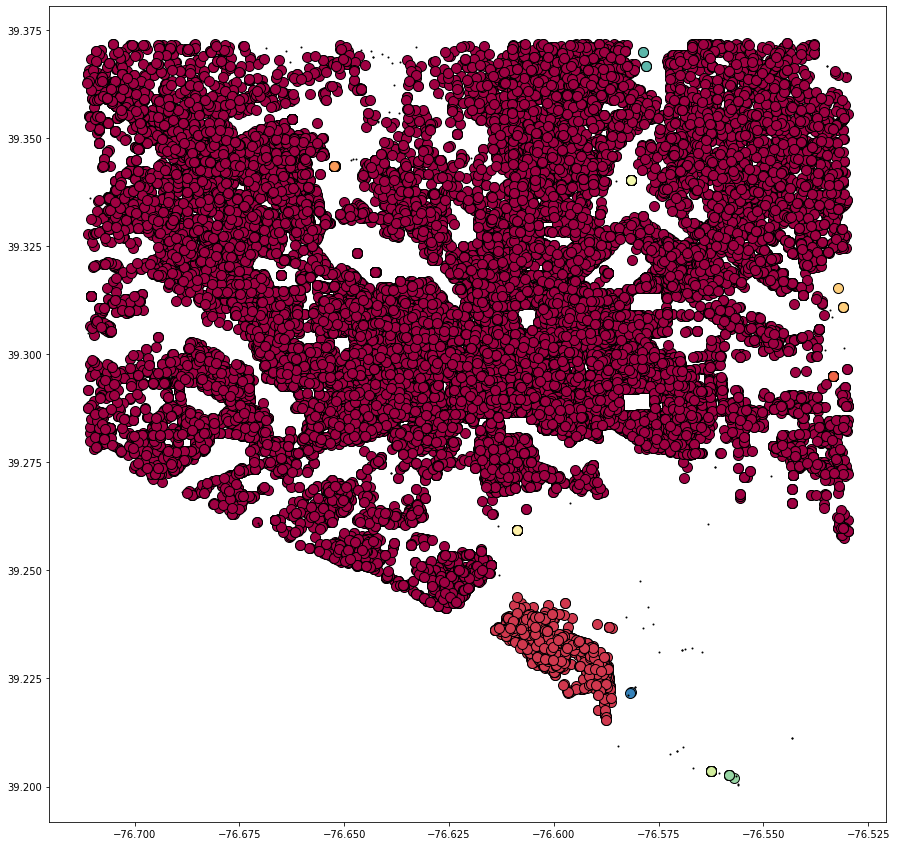

In [122]:
fig, ax = plt.subplots(figsize = (15,15))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = coords[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

In [123]:
shooting_df = gdf[gdf['Description'] == 'SHOOTING']
rape_df = gdf[gdf['Description'] == 'RAPE']
streetrob_df = gdf[gdf['Description'] == 'ROBBERY - STREET']

In [124]:
coords = shooting_df[["Longitude", "Latitude"]].values

In [125]:
db = DBSCAN(eps = .000029, algorithm='ball_tree', metric= 'haversine').fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [126]:
labels = db.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [127]:
clusters = pd.Series([coords[labels == n] for n in range(num_clusters)])

In [128]:
num_clusters

43

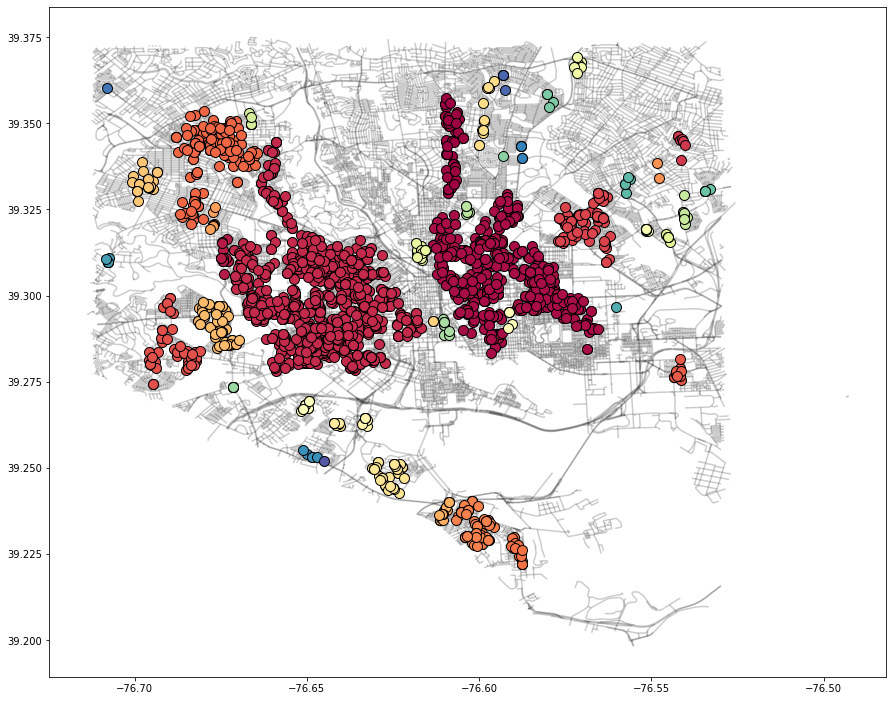

In [129]:
fig, ax = plt.subplots(figsize = (15,15))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
street.plot(ax = ax, color = 'black', alpha = .2)

In [130]:
coords = rape_df[["Longitude", "Latitude"]].values

In [131]:
db = DBSCAN(eps = .000029, algorithm='ball_tree', metric= 'haversine').fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [132]:
labels = db.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [133]:
clusters = pd.Series([coords[labels == n] for n in range(num_clusters)])

In [134]:
num_clusters

51

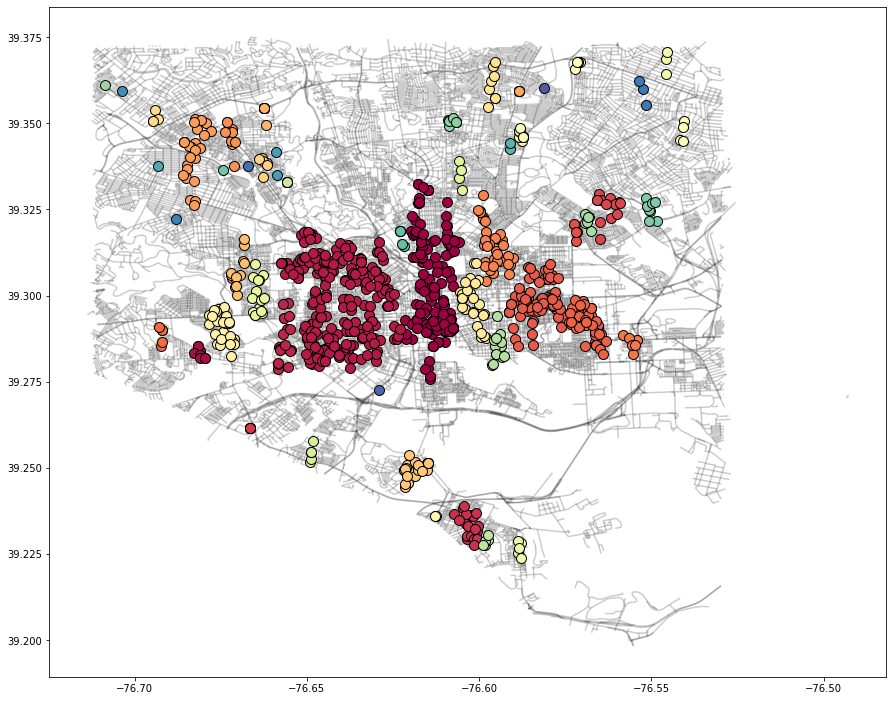

In [135]:
fig, ax = plt.subplots(figsize = (15,15))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
street.plot(ax = ax, color = 'black', alpha = .2)

In [136]:
coords = streetrob_df[["Longitude", "Latitude"]].values

In [137]:
db = DBSCAN(eps = .000012, algorithm='ball_tree', metric= 'haversine').fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [138]:
labels = db.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [139]:
clusters = pd.Series([coords[labels == n] for n in range(num_clusters)])

In [140]:
num_clusters

315

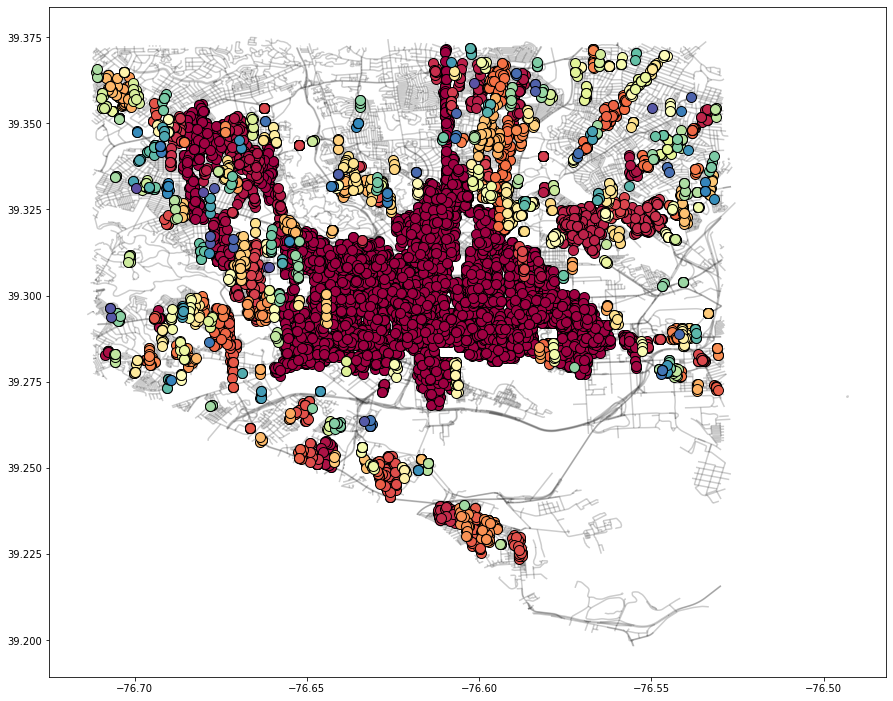

In [141]:
fig, ax = plt.subplots(figsize = (15,15))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
street.plot(ax = ax, color = 'black', alpha = .2)

In [143]:
#Data timeseries by day simple graph
daycount = gdf.groupby(pd.Grouper(freq ='D')).agg('count')

In [144]:
daycount

Location  Description  In_Out  Weapon  Post  District  \
DateTime                                                            
2012-01-01  174       174          174     174     174   174        
2012-01-02  101       101          101     101     101   101        
2012-01-03  96        96           96      96      96    96         
2012-01-04  116       116          116     116     116   116        
2012-01-05  128       128          128     128     128   128        
...         ...       ...          ...     ...     ...   ...        
2017-08-29  94        94           94      94      94    94         
2017-08-30  88        88           88      88      88    88         
2017-08-31  95        95           95      95      95    95         
2017-09-01  91        91           91      91      91    91         
2017-09-02  68        68           68      68      68    68         

            Neighborhood  Longitude  Latitude  Location 1  Premise  geometry  
DateTime                                                                      
2012-01-01  174           174        174       174         174      174       
2012-01-02  101           101        101       101         101      101       
2012-01-03  96            96         96        96          96       96        
2012-01-04  116           116        116       116         116      116       
2012-01-05  128           128        128       128         128      128       
...         ...           ...        ...       ...         ...      ...       
2017-08-29  94            94         94        94          94       94        
2017-08-30  88            88         88        88          88       88        
2017-08-31  95            95         95        95          95       95        
2017-09-01  91            91         91        91          91       91        
2017-09-02  68            68         68        68          68       68        

[2072 rows x 12 columns]

In [145]:
daycount = daycount['Location']

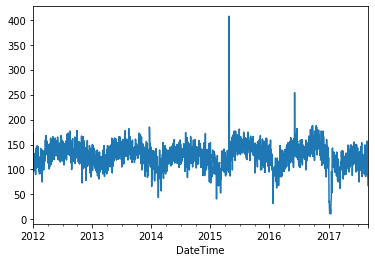

In [147]:
daycount.plot( markersize=.01)

In [148]:
daycount.idxmax()

#Google search shows that this is when the baltimore riots happened

Timestamp('2015-04-27 00:00:00', freq='D')

In [149]:
daycount.nsmallest(5)

DateTime
2017-01-14    11
2017-01-08    12
2017-01-09    13
2017-01-11    15
2017-01-07    17
Name: Location, dtype: int64

In [150]:
month = gdf.groupby(pd.Grouper(freq ='M')).agg('count')
month = month['Location']

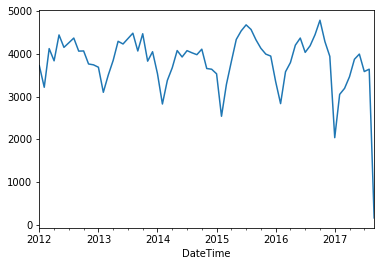

In [151]:
month.plot( markersize=1)

In [152]:
month.nsmallest(10)

DateTime
2017-09-30    159 
2017-01-31    2038
2015-02-28    2539
2014-02-28    2826
2016-02-29    2835
2017-02-28    3051
2013-02-28    3100
2017-03-31    3193
2012-02-29    3218
2015-03-31    3285
Name: Location, dtype: int64

In [153]:
week = gdf.groupby(pd.Grouper(freq ='7d')).agg('count')

In [154]:
week = week['Location']

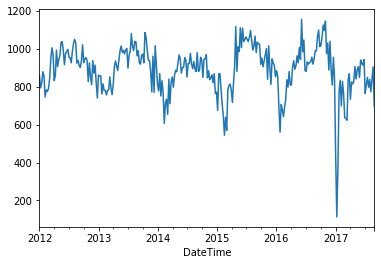

In [155]:
week.plot(markersize=1)

In [156]:
week.nsmallest()

DateTime
2017-01-08    113
2017-01-15    375
2017-01-01    437
2015-02-15    544
2016-01-24    560
Name: Location, dtype: int64

In [157]:
eventgdf = eventgdf.set_index('start_date') 

In [158]:
eventdaycount = eventgdf.groupby(pd.Grouper(freq ='D')).agg('count')

In [159]:
eventdaycount = eventdaycount['intermediate_location_text']

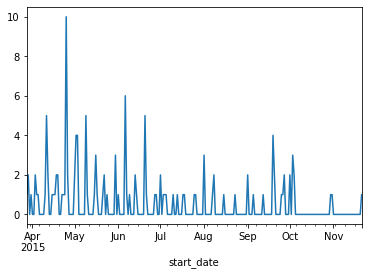

In [160]:
eventdaycount.plot(markersize=.01)

In [161]:
daycount2015 = daycount.loc['2015-01-01':'2015-12-31']

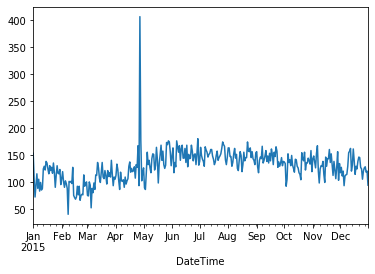

In [162]:
daycount2015.plot( markersize=.01)

In [506]:
conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jbarb\Anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    convertdate-2.1.3          |          py_1000          30 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.1            |             py_0          56 KB  conda-forge
    libpython-2.0              |           py37_0          47 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    m2w64-binutils-2.25.1      |                5        44.3 MB
    m2w64-bzip2-1.0.6          |                6         100 KB
    m2w64-crt-git-5.0.0.4636.2595836|                2         3.4 MB
    m2w64-gcc-5.3.0            |  

In [163]:
import fbprophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [164]:
df_daycount = daycount.reset_index()

In [165]:
#preparing daycount for use in FB Prophet
df_daycount.rename(columns={"DateTime": "ds", "Location": "y"}, inplace = True)

In [166]:
m = Prophet()

In [167]:
m.fit(df_daycount)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [168]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
2432 2018-08-29
2433 2018-08-30
2434 2018-08-31
2435 2018-09-01
2436 2018-09-02

In [169]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2432 2018-08-29  104.280489  78.613682   128.743013
2433 2018-08-30  102.961917  78.495364   129.230602
2434 2018-08-31  110.095284  84.889841   135.849395
2435 2018-09-01  100.433131  74.310709   123.757695
2436 2018-09-02  96.752952   70.978870   124.124089

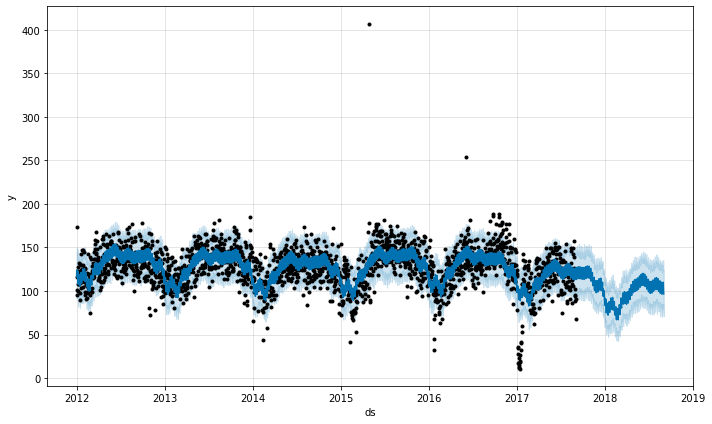

In [170]:
fig1 = m.plot(forecast)

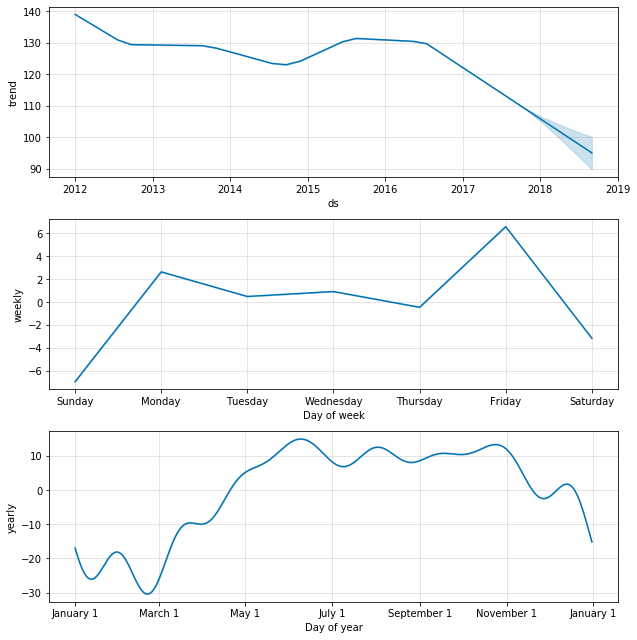

In [171]:
fig2 = m.plot_components(forecast)